# Projekt 1 (temat 1) - kamien milowy 2

## Autorzy: Jan Skwarek, Daniel Tytkowski

## Wstępna analiza

Wczytajmy najpierw niezbędne biblioteki i pakiety.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

Zacznijmy od załadowania ramki danych i podziału zbioru na zbiór do budowy i walidacyjny.

In [ ]:
!wget https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/census_income_dataset.csv
df_raw = pd.read_csv('census_income_dataset.csv')
df_build = df_raw.sample(frac=0.7, random_state=500)
df_validation = df_raw.drop(df_build.index) 
df = df_build.sample(frac=0.7, random_state=500)
df_test = df_build.drop(df.index) 

--2022-04-01 12:54:25--  https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/census_income_dataset.csv
Resolving lovespreadsheet-tutorials.s3.amazonaws.com (lovespreadsheet-tutorials.s3.amazonaws.com)... 52.216.249.28
Connecting to lovespreadsheet-tutorials.s3.amazonaws.com (lovespreadsheet-tutorials.s3.amazonaws.com)|52.216.249.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5717107 (5.5M) [text/csv]
Saving to: ‘census_income_dataset.csv’

census_income_datas 100%[===================>]   5.45M  34.2MB/s    in 0.2s    

2022-04-01 12:54:25 (34.2 MB/s) - ‘census_income_dataset.csv’ saved [5717107/5717107]



Pierwsze spojrzenie na dane.

In [ ]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
20969,34,Private,36385.0,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,2258.0,50.0,United-States,<=50K
14393,23,Private,150463.0,HS-grad,9,Never-married,Priv-house-serv,Unmarried,Other,Female,0.0,0.0,40.0,Guatemala,<=50K
2480,41,Private,195897.0,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
10614,39,Local-gov,189911.0,11th,7,Divorced,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
31047,45,Private,191098.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,China,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45031,33,Local-gov,40142.0,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,56.0,United-States,<=50K
24143,40,Private,34113.0,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Male,6849.0,0.0,43.0,United-States,<=50K
23994,43,Private,184321.0,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.0,1887.0,40.0,United-States,>50K
1398,51,Private,246519.0,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,2105.0,0.0,45.0,United-States,<=50K


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
20969,34,Private,36385.0,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,2258.0,50.0,United-States,<=50K
14393,23,Private,150463.0,HS-grad,9,Never-married,Priv-house-serv,Unmarried,Other,Female,0.0,0.0,40.0,Guatemala,<=50K
2480,41,Private,195897.0,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
10614,39,Local-gov,189911.0,11th,7,Divorced,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
31047,45,Private,191098.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,China,<=50K


Poszukajmy braków danych.

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_level      0
dtype: int64

Nie oznacza to jednak, że tych braków nie ma.

In [ ]:
print(df.loc[df.workclass == "?"].__len__())
print(df.loc[df.occupation == "?"].__len__())
print(df.loc[df.native_country == "?"].__len__())

1389
1396
406


Braki danych jednak się pojawiają.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23932 entries, 20969 to 12337
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             23932 non-null  int64  
 1   workclass       23932 non-null  object 
 2   fnlwgt          23932 non-null  float64
 3   education       23932 non-null  object 
 4   education_num   23932 non-null  int64  
 5   marital_status  23932 non-null  object 
 6   occupation      23932 non-null  object 
 7   relationship    23932 non-null  object 
 8   race            23932 non-null  object 
 9   sex             23932 non-null  object 
 10  capital_gain    23932 non-null  float64
 11  capital_loss    23932 non-null  float64
 12  hours_per_week  23932 non-null  float64
 13  native_country  23932 non-null  object 
 14  income_level    23932 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 2.9+ MB


In [ ]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,23932.000000,2.393200e+04,23932.000000,23932.000000,23932.000000,23932.000000
mean,38.729567,1.894658e+05,10.087540,1101.545880,86.758232,40.420734
std,13.749673,1.059030e+05,2.573849,7596.680172,401.935600,12.363366
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173100e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782425e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.378768e+05,12.250000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3900.000000,99.000000


In [ ]:
dfInfo = pd.read_csv('attributes_census_income.csv')
dfInfo

,name,type,description
0,age,integer,age of individual
1,workclass,string,"Values: Private, Self-emp-not-inc, Self-emp-in..."
2,fnlwgt,float,Final sampling weight. Inverse of sampling fra...
3,education,string,"Values: Bachelors, Some-college, 11th, HS-grad..."
4,education_num,integer,NaN
5,marital_status,string,"Values: Married-civ-spouse, Divorced, Never-ma..."
6,occupation,string,"Values: Tech-support, Craft-repair, Other-serv..."
7,relationship,string,"Values: Wife, Own-child, Husband, Not-in-famil..."
8,race,string,"Values: White, Asian-Pac-Islander, Amer-Indian..."
9,sex,string,"Values: Female, Male"


In [ ]:
df.nunique()

age                  72
workclass             9
fnlwgt            17337
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        116
capital_loss         91
hours_per_week       92
native_country       42
income_level          2
dtype: int64

Wstępne histogramy, żeby zobaczyć rozkłady.

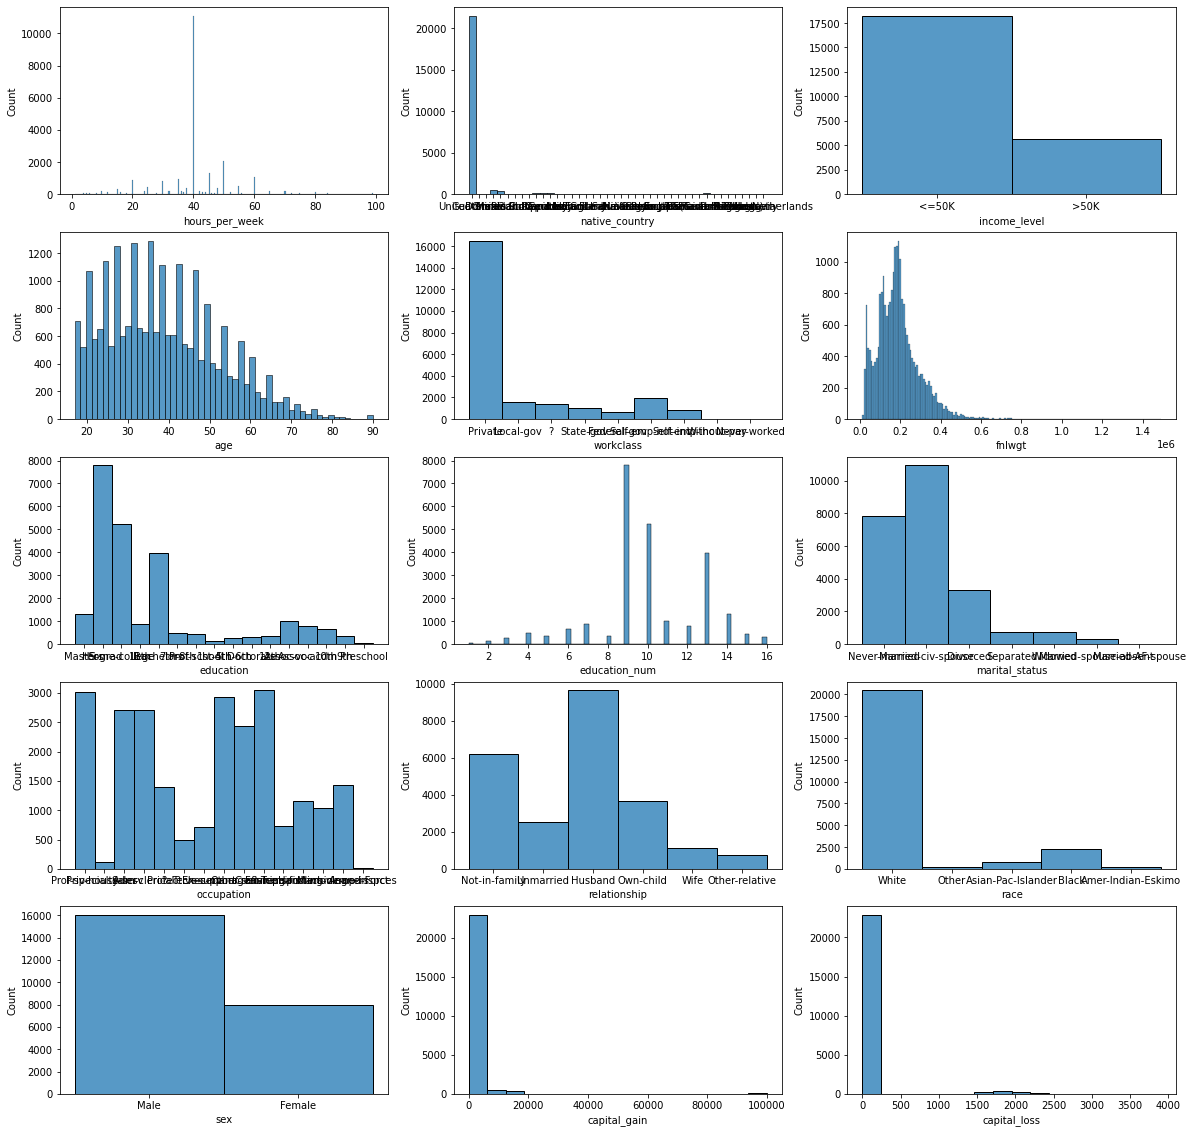

In [ ]:
fig, axs = plt.subplots(nrows=5,ncols=3, figsize= (20,20))
for i in range(5):
    for j in range(3):
        sns.histplot(df, x=df.columns[(i-1)*3 + j], ax=axs[i,j])

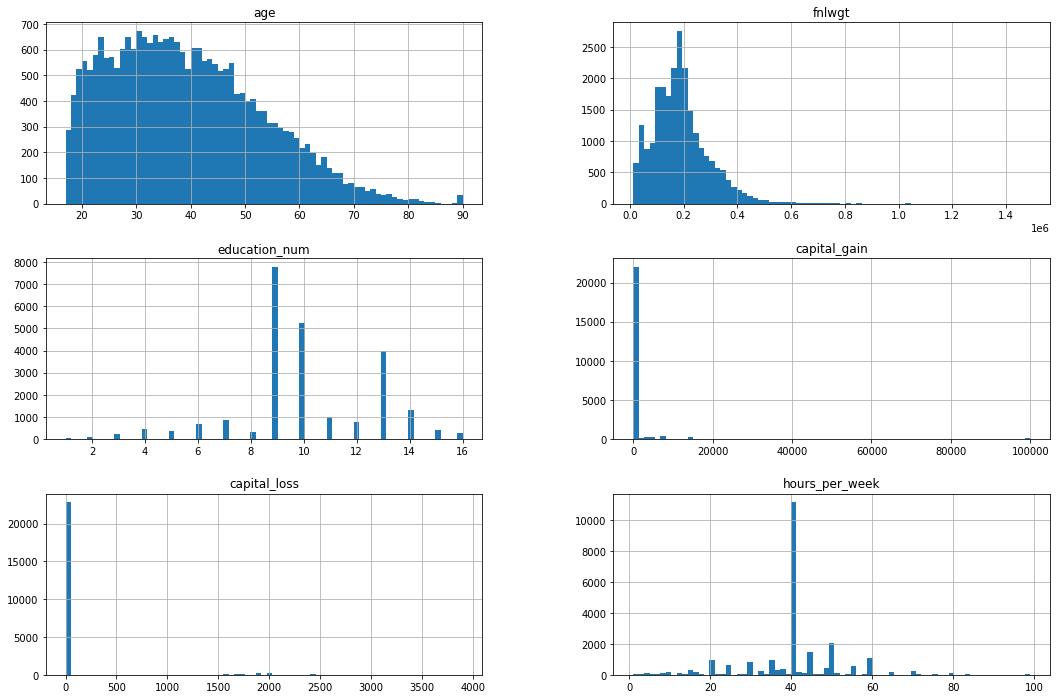

In [ ]:
df.hist(bins = 73, figsize=(18, 12))
plt.show()

## Analiza jednowymiarowa

### age




In [ ]:
df['age'].value_counts()

30    672
33    657
36    651
23    650
31    648
     ... 
84      5
83      5
88      3
85      1
89      1
Name: age, Length: 72, dtype: int64

In [ ]:
df['age'].value_counts().size

72

In [ ]:
df['age'].describe()

count    23932.000000
mean        38.729567
std         13.749673
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

Sprawdźmy jak wygląda boxplot.

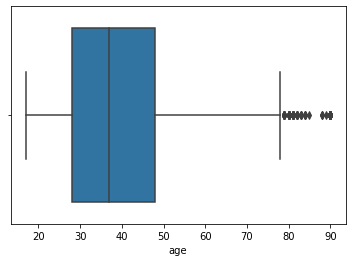

In [ ]:
sns.boxplot(df['age'])
plt.show()

In [ ]:
IQR = 48 - 28
print(28 - IQR * 1.5)
print(48 + IQR * 1.5)

-2.0
78.0


In [ ]:
(df['age']>78).sum()

105

Zobaczmy histogram.

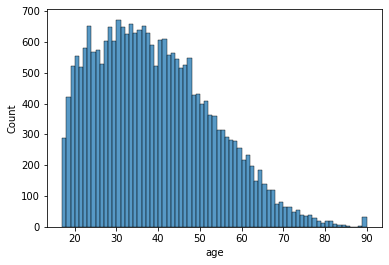

In [ ]:
sns.histplot(df['age'],binwidth=1)
plt.show()

Widać jednak, że nie ma tu outlayerów.

### workclass

In [ ]:
df['workclass'].value_counts()

Private             16511
Self-emp-not-inc     1952
Local-gov            1538
?                    1389
State-gov            1016
Self-emp-inc          835
Federal-gov           675
Without-pay             9
Never-worked            7
Name: workclass, dtype: int64

Pojawiają się tutaj braki danych w postaci znaków zapytania.

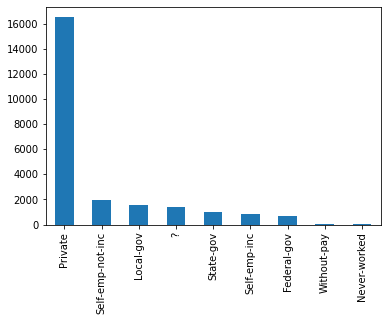

In [ ]:
df['workclass'].value_counts().plot(kind="bar")
plt.show()

In [ ]:
df.loc[df.workclass == "?"].__len__()

1389

### fnlwgt

In [ ]:
df['fnlwgt'].value_counts()

125892.0    10
203488.0    10
121124.0     9
127651.0     9
126569.0     9
            ..
120359.0     1
285855.0     1
92288.0      1
141076.0     1
246519.0     1
Name: fnlwgt, Length: 17337, dtype: int64

In [ ]:
df['fnlwgt'].value_counts().size

17337

In [ ]:
df['fnlwgt'].describe()

count    2.393200e+04
mean     1.894658e+05
std      1.059030e+05
min      1.228500e+04
25%      1.173100e+05
50%      1.782425e+05
75%      2.378768e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

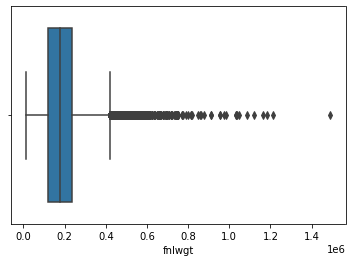

In [ ]:
sns.boxplot(df['fnlwgt'])
plt.show()

In [ ]:
IQR = 2.372720e+05 - 1.175280e+05
print(1.175280e+05 - IQR * 1.5)
print(2.372720e+05 + IQR * 1.5)

-62088.0
416888.0


In [ ]:
(df['fnlwgt']>416888).sum()

731

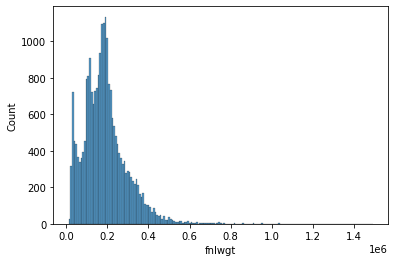

In [ ]:
sns.histplot(df['fnlwgt'])
plt.show()

### education

In [ ]:
df['education'].value_counts()

HS-grad         7785
Some-college    5248
Bachelors       3959
Masters         1303
Assoc-voc       1005
11th             880
Assoc-acdm       786
10th             665
7th-8th          481
Prof-school      426
9th              366
12th             331
Doctorate        295
5th-6th          247
1st-4th          116
Preschool         39
Name: education, dtype: int64

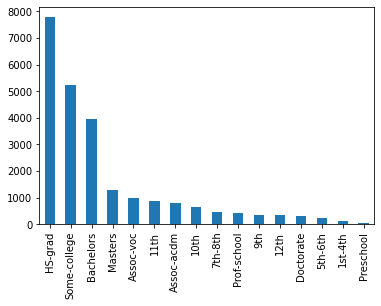

In [ ]:
df['education'].value_counts().plot(kind="bar")
plt.show()

### education_num

In [ ]:
df['education_num'].value_counts()

9     7785
10    5248
13    3959
14    1303
11    1005
7      880
12     786
6      665
4      481
15     426
5      366
8      331
16     295
3      247
2      116
1       39
Name: education_num, dtype: int64

In [ ]:
df['education_num'].value_counts().size

16

In [ ]:
df['education_num'].describe()

count    23932.000000
mean        10.087540
std          2.573849
min          1.000000
25%          9.000000
50%         10.000000
75%         12.250000
max         16.000000
Name: education_num, dtype: float64

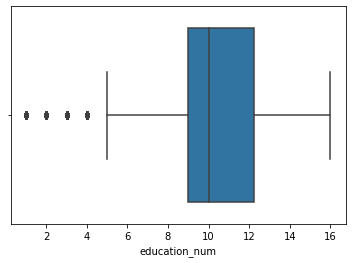

In [ ]:
sns.boxplot(df['education_num'])
plt.show()

In [ ]:
IQR = 12 - 9
print(9 - IQR * 1.5)
print(12 + IQR * 1.5)

4.5
16.5


In [ ]:
(df['education_num']<4.5).sum()

883

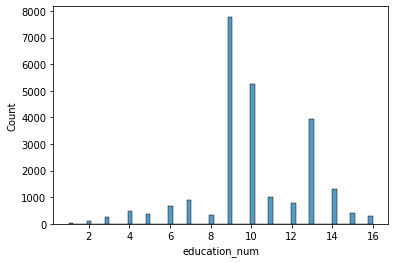

In [ ]:
sns.histplot(df['education_num'])
plt.show()

Zmienna może mieć korelację '1' z 'education' i być jedynie numerycznym odpowiednikiem tamtej zmiennej.

### marital_status

In [ ]:
df['marital_status'].value_counts()

Married-civ-spouse       10938
Never-married             7867
Divorced                  3302
Widowed                    754
Separated                  742
Married-spouse-absent      311
Married-AF-spouse           18
Name: marital_status, dtype: int64

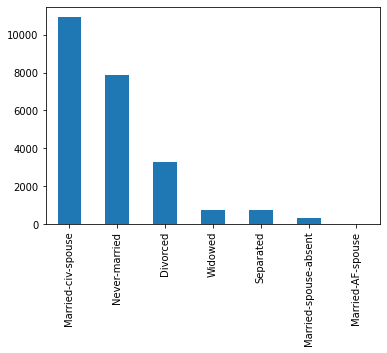

In [ ]:
df['marital_status'].value_counts().plot(kind="bar")
plt.show()

### occupation

In [ ]:
df['occupation'].value_counts()

Craft-repair         3042
Prof-specialty       3018
Exec-managerial      2927
Adm-clerical         2713
Sales                2704
Other-service        2441
Machine-op-inspct    1429
?                    1396
Transport-moving     1151
Handlers-cleaners    1034
Farming-fishing       727
Tech-support          722
Protective-serv       493
Priv-house-serv       127
Armed-Forces            8
Name: occupation, dtype: int64

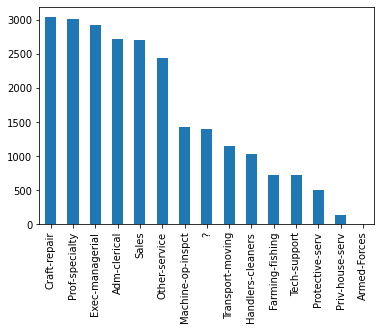

In [ ]:
df['occupation'].value_counts().plot(kind="bar")
plt.show()

Pojawiają się braki danych w postaci '?'.

In [ ]:
df.loc[df.occupation == "?"].__len__()

1396

### relationship

In [ ]:
df['relationship'].value_counts()

Husband           9635
Not-in-family     6199
Own-child         3674
Unmarried         2526
Wife              1134
Other-relative     764
Name: relationship, dtype: int64

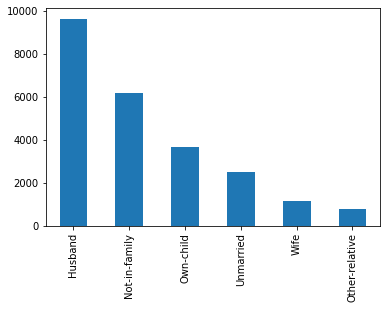

In [ ]:
df['relationship'].value_counts().plot(kind="bar")
plt.show()

### race

In [ ]:
df['race'].value_counts()

White                 20451
Black                  2308
Asian-Pac-Islander      750
Amer-Indian-Eskimo      225
Other                   198
Name: race, dtype: int64

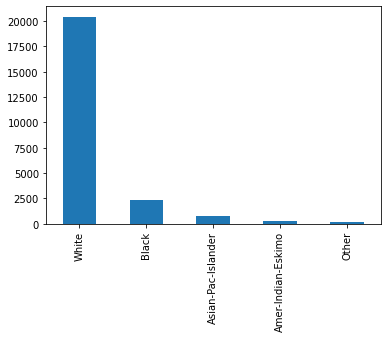

In [ ]:
df['race'].value_counts().plot(kind="bar")
plt.show()

### sex

In [ ]:
df['sex'].value_counts()

Male      15984
Female     7948
Name: sex, dtype: int64

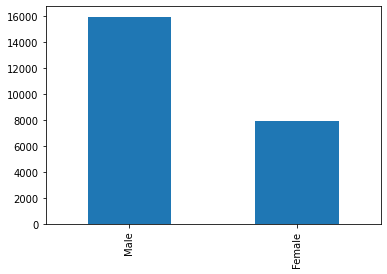

In [ ]:
df['sex'].value_counts().plot(kind="bar")
plt.show()

### capital_gain

In [ ]:
df['capital_gain'].value_counts()

0.0        21962
15024.0      257
7688.0       190
7298.0       179
99999.0      125
           ...  
6360.0         1
2961.0         1
5556.0         1
2062.0         1
1151.0         1
Name: capital_gain, Length: 116, dtype: int64

In [ ]:
df['capital_gain'].value_counts().size

116

In [ ]:
df['capital_gain'].describe()

count    23932.000000
mean      1101.545880
std       7596.680172
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

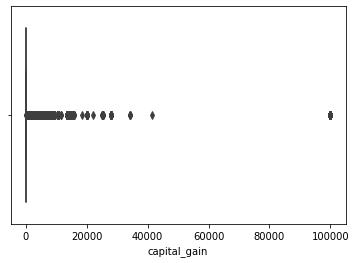

In [ ]:
sns.boxplot(df['capital_gain'])
plt.show()

In [ ]:
IQR = 0 - 0
print(0 - IQR * 1.5)
print(0 + IQR * 1.5)

0.0
0.0


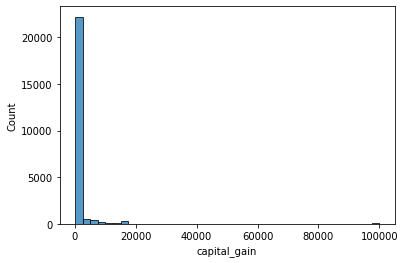

In [ ]:
sns.histplot(df['capital_gain'], bins = 40)
plt.show()

Zdecydowana większość wartości mieści się w przedziale od zera do 20 tysięcy. Jest jednak jedna wysoka wartość z prawej strony. Sprawdźmy czy to pojedynczy przypadek i czy mamy dużo takich ogromnych wartości.

In [ ]:
df.loc[df.capital_gain > 20000].__len__()

183

In [ ]:
df.loc[df.capital_gain < 20000].__len__()

23749

In [ ]:
df.loc[df.capital_gain > 0].__len__()

1970

In [ ]:
df.loc[df.capital_gain == 0].__len__()

21962

Tak naprawdę niewiele wartości jest większych od zera.

In [ ]:
df.loc[df.capital_gain > 42000].__len__()

125

In [ ]:
df.loc[df.capital_gain == 99999].__len__()

125

Wszystkie wartości przyjmujące wartości powyżej 42 tysięcy, przyjmują wartość równą 99999. Oznacza to, że zmienna została prawdopodobnie sczapeczkowana.

### capital_loss

In [ ]:
df['capital_loss'].value_counts()

0.0       22828
1902.0      144
1977.0      129
1887.0      104
2415.0       37
          ...  
1911.0        1
1735.0        1
2467.0        1
2754.0        1
2282.0        1
Name: capital_loss, Length: 91, dtype: int64

In [ ]:
df['capital_loss'].value_counts().size

91

In [ ]:
df['capital_loss'].describe()

count    23932.000000
mean        86.758232
std        401.935600
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3900.000000
Name: capital_loss, dtype: float64

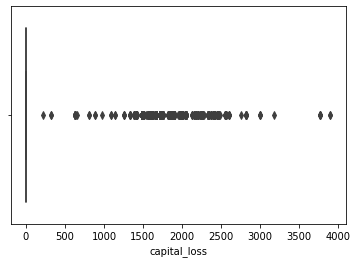

In [ ]:
sns.boxplot(df['capital_loss'])
plt.show()

In [ ]:
IQR = 0 - 0
print(0 - IQR * 1.5)
print(0 + IQR * 1.5)

0.0
0.0


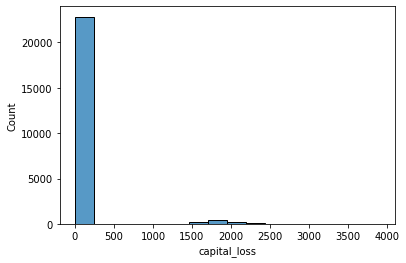

In [ ]:
sns.histplot(df['capital_loss'])
plt.show()

Tutaj mamy w miarę 'normalne' wartości, bez skrajności. Raczej nie widać outlierów. Albo ktoś ma 'capitol_loss' równy zero, albo jest to w miarę normalna liczba.

### hours_per_week

In [ ]:
df['hours_per_week'].value_counts()

40.0    11110
50.0     2078
45.0     1340
60.0     1077
35.0      972
        ...  
91.0        1
82.0        1
74.0        1
87.0        1
89.0        1
Name: hours_per_week, Length: 92, dtype: int64

In [ ]:
df['hours_per_week'].value_counts().size

92

In [ ]:
df['hours_per_week'].describe()

count    23932.000000
mean        40.420734
std         12.363366
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

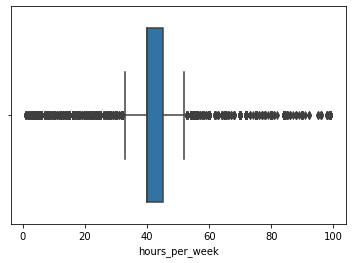

In [ ]:
sns.boxplot(df['hours_per_week'])
plt.show()

In [ ]:
IQR = 45 - 40
print(40 - IQR * 1.5)
print(45 + IQR * 1.5)

32.5
52.5


In [ ]:
(df['hours_per_week']<32.5).sum()

4044

In [ ]:
(df['hours_per_week']>52.5).sum()

2550

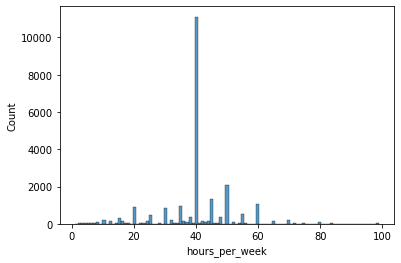

In [ ]:
sns.histplot(df['hours_per_week'], bins = 99)
plt.show()

Większość osób pracuje 40 godzin (pełen etat). Nikt nie pracuje poniżej jednej godziny. Sprawdźmy czy zmienna została sczapeczkowana.

In [ ]:
df.loc[df.hours_per_week == 99].__len__()

57

Bardzo możliwe, że została. Nie ma to jednak większego wpływu.

### native_country

In [ ]:
df['native_country'].value_counts()

United-States                 21526
Mexico                          457
?                               406
Philippines                     152
Germany                         110
Puerto-Rico                      98
Canada                           79
India                            72
England                          68
Cuba                             66
El-Salvador                      63
Italy                            60
China                            55
Dominican-Republic               55
Jamaica                          51
South                            48
Vietnam                          45
Japan                            41
Guatemala                        41
Columbia                         40
Haiti                            39
Poland                           39
Portugal                         30
Taiwan                           29
Nicaragua                        26
Iran                             24
Greece                           24
Peru                        

In [ ]:
df['native_country'].value_counts().size

42

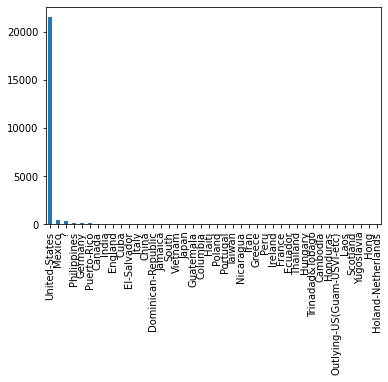

In [ ]:
df['native_country'].value_counts().plot(kind="bar")
plt.show()

Pojawiaja się braki danych w postaci '?'. Ile ich jest?

In [ ]:
df.loc[df.native_country == '?'].__len__()

406

### income_level

In [ ]:
df['income_level'].value_counts()

<=50K    18255
>50K      5677
Name: income_level, dtype: int64

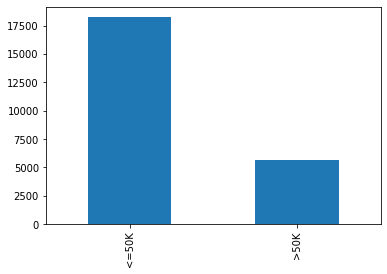

In [ ]:
df['income_level'].value_counts().plot(kind="bar")
plt.show()

Jest to nasza zmienna celu.

## Analiza wielowymiarowa

Zacznijmy od tego co rzuciło się w oczy, zmienne capital_loss i capital_gain zawierały bardzo dużo zerowych wartości

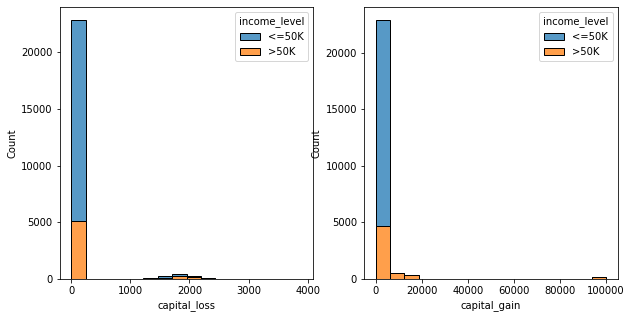

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize= (10,5))

sns.histplot(df, x='capital_loss', hue='income_level', multiple='stack', ax=axs[0])
sns.histplot(df, x='capital_gain', hue='income_level', multiple='stack', ax=axs[1])
plt.show()

In [ ]:
df.loc[(df.capital_loss == 0) & (df.income_level=='<=50K')].__len__()/df.loc[(df.capital_loss == 0) & (df.income_level=='>50K')].__len__()

3.4481683554169913

In [ ]:
df.loc[(df.capital_gain == 0) & (df.income_level=='<=50K')].__len__()/df.loc[(df.capital_gain == 0) & (df.income_level=='>50K')].__len__()

3.926424405563033

In [ ]:
df.loc[(df.capital_loss > 0) & (df.income_level=='<=50K')].__len__()/df.loc[(df.capital_loss > 0) & (df.income_level=='>50K')].__len__()

1.0256880733944953

In [ ]:
df.loc[(df.capital_gain > 0) & (df.income_level=='<=50K')].__len__()/df.loc[(df.capital_gain > 0) & (df.income_level=='>50K')].__len__()

0.616078753076292

In [ ]:
df.loc[df.income_level=='<=50K'].__len__()/df.loc[df.income_level=='>50K'].__len__()
#proporcje, kto ile zarabia biorąc wszystkie rekordy z próbki

3.215606834595737

Wygląda na to, że mogą jednak wpłynąć na predykcję. Wartości większych od 0 jest na tyle mało, że możemy zdyskretyzować na wartości równe 0 i wartości większe od 0.

Przejdzmy do wykresu korelacji. Skorzystałem z metody V Cramera do liczenia korelacji cech (kod znalazłem tutaj: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9). Co prawda nie wszystkie zmienne są kategorczyne - zapuścimy algorytm raz jeszcze po zmianie zmiennych ciągłych na kategoryczne.

In [ ]:
# import scipy.stats as ss
# def cramers_v2(x, y):
#     confusion_matrix = pd.crosstab(x,y)
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     rcorr = r-((r-1)**2)/(n-1)
#     kcorr = k-((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
# A = [[0 for x in range(15)] for x in range(15)]

In [ ]:
# for i in range(15):
#     for j in range(i+1,15):
#         A[i][j]= cramers_v2(df.iloc[:,i], df.iloc[:,j])

In [ ]:
# plt.figure(figsize = (10,10))
# sns.heatmap(A, annot=True)

In [ ]:
# for i in range(15):
#   print(i, df.columns[i])

Zauważamy kilka silniejszych korelacji i jedną maksymalną.

In [ ]:
print(df.columns[3], df.columns[4])

education education_num


In [ ]:
df.nunique()

age                  72
workclass             9
fnlwgt            17337
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        116
capital_loss         91
hours_per_week       92
native_country       42
income_level          2
dtype: int64

Obydwie kolumny mają taką samą ilość unikalnych wartości. Zapewne oznaczają to samo tylko jedna zawiera watości liczbowe, a druga stringi. Jeśli rzeczywiście tak jest możemy jedną z nich napewno wyrzucić.

In [ ]:
print(df[['education','education_num']].drop_duplicates())

df[['education','education_num']].drop_duplicates().__len__()

          education  education_num
20969       Masters             14
14393       HS-grad              9
2480   Some-college             10
10614          11th              7
31047     Bachelors             13
22378       7th-8th              4
16877   Prof-school             15
47654       1st-4th              2
43709       5th-6th              3
26093     Doctorate             16
21107          12th              8
20533     Assoc-voc             11
12171    Assoc-acdm             12
5800           10th              6
17034           9th              5
33620     Preschool              1


16

Mamy 16 unikalnych par, są to dokładnie te same kolumny.
Teraz kolumny 9 i 7.

In [ ]:
print(df.columns[7],df.columns[9])

relationship sex


In [ ]:
df[['relationship','sex']].apply(pd.unique)

relationship    [Not-in-family, Unmarried, Husband, Own-child,...
sex                                                [Male, Female]
dtype: object

<AxesSubplot:xlabel='relationship', ylabel='count'>

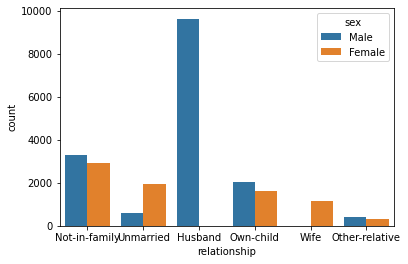

In [ ]:
sns.countplot(data=df, x="relationship", hue="sex")

Wartości takie jak mąż i żona są oczywiście ściśle powiązane z płciami.

In [ ]:
print(df.columns[2], df.columns[9])
print(df.columns[2], df.columns[8])

fnlwgt sex
fnlwgt race


<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

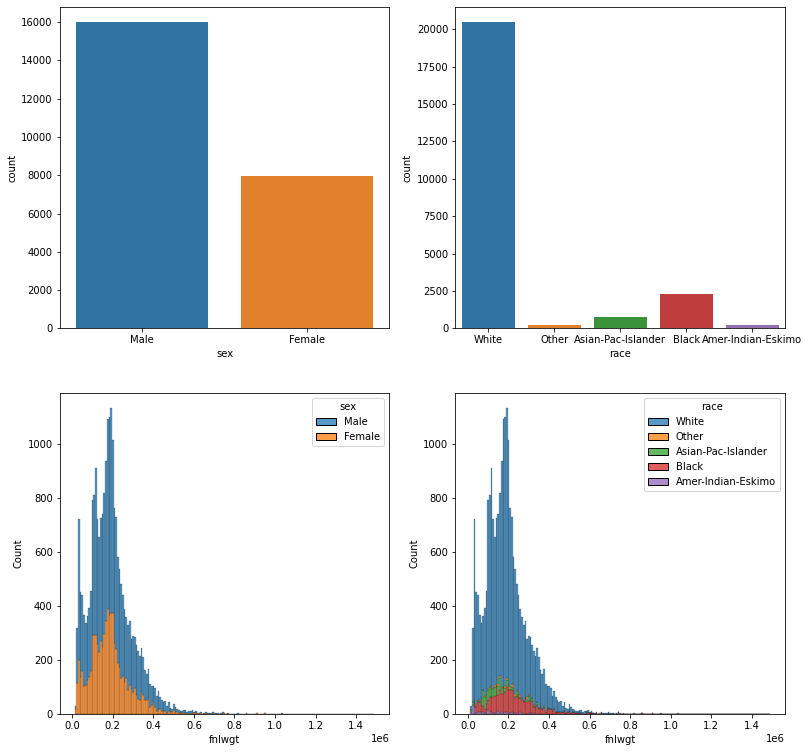

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=2, figsize= (13,13))
sns.countplot(data=df, x="sex", ax = axs[0,0])
sns.countplot(data=df, x="race", ax=axs[0,1])

sns.histplot(df, x="fnlwgt", hue="sex", multiple='stack', ax=axs[1,0])
sns.histplot(df, x="fnlwgt", hue="race",multiple='stack', ax=axs[1,1])


Najbardziej powinny nas interesować korelacje z kolumną income_level. Mamy tam kilka większych.

<AxesSubplot:xlabel='income_level', ylabel='count'>

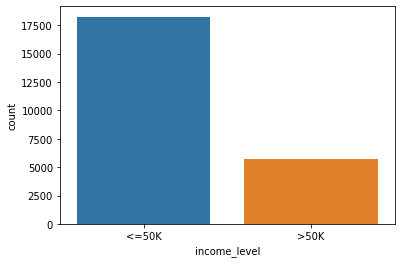

In [ ]:
sns.countplot(data=df,x="income_level")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Masters'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, 'Some-college'),
  Text(3, 0, '11th'),
  Text(4, 0, 'Bachelors'),
  Text(5, 0, '7th-8th'),
  Text(6, 0, 'Prof-school'),
  Text(7, 0, '1st-4th'),
  Text(8, 0, '5th-6th'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, '12th'),
  Text(11, 0, 'Assoc-voc'),
  Text(12, 0, 'Assoc-acdm'),
  Text(13, 0, '10th'),
  Text(14, 0, '9th'),
  Text(15, 0, 'Preschool')])

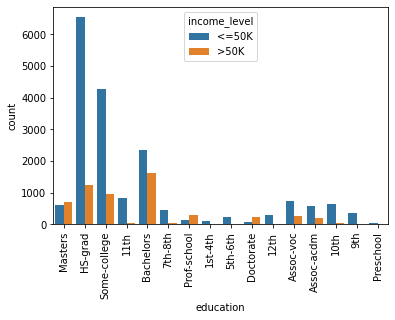

In [ ]:
#fig, axs = plt.subplots(nrows=2,ncols=2, figsize= (13,13))
sns.countplot(data=df, x="education", hue="income_level")#, ax=axs[0,0])
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Separated'),
  Text(4, 0, 'Widowed'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

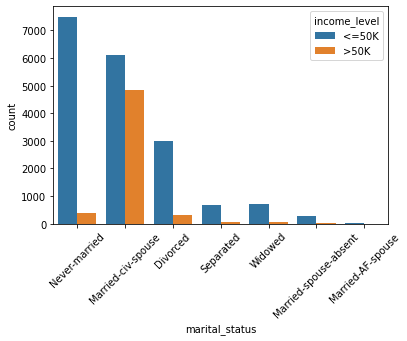

In [ ]:
sns.countplot(data=df, x="marital_status", hue="income_level")#, ax=axs[0,1])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Prof-specialty'),
  Text(1, 0, 'Priv-house-serv'),
  Text(2, 0, 'Sales'),
  Text(3, 0, 'Adm-clerical'),
  Text(4, 0, '?'),
  Text(5, 0, 'Protective-serv'),
  Text(6, 0, 'Tech-support'),
  Text(7, 0, 'Exec-managerial'),
  Text(8, 0, 'Other-service'),
  Text(9, 0, 'Craft-repair'),
  Text(10, 0, 'Farming-fishing'),
  Text(11, 0, 'Transport-moving'),
  Text(12, 0, 'Handlers-cleaners'),
  Text(13, 0, 'Machine-op-inspct'),
  Text(14, 0, 'Armed-Forces')])

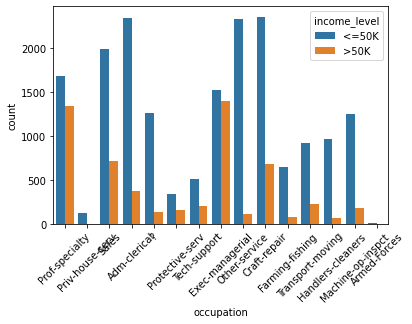

In [ ]:
sns.countplot(data=df, x="occupation", hue="income_level")#, ax=axs[0,1])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Not-in-family'),
  Text(1, 0, 'Unmarried'),
  Text(2, 0, 'Husband'),
  Text(3, 0, 'Own-child'),
  Text(4, 0, 'Wife'),
  Text(5, 0, 'Other-relative')])

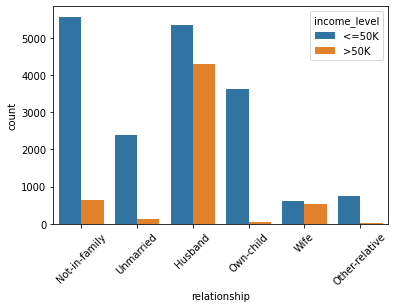

In [ ]:
sns.countplot(data=df, x="relationship", hue="income_level")#, ax=axs[0,1])
plt.xticks(rotation=45)

Sprawdźmy jeszcze inne typy korelacje. Zacznijmy od korelacji zmiennych ciągłych - metodą Pearsona, Kendalla oraz Spearmana.

<function matplotlib.pyplot.show>

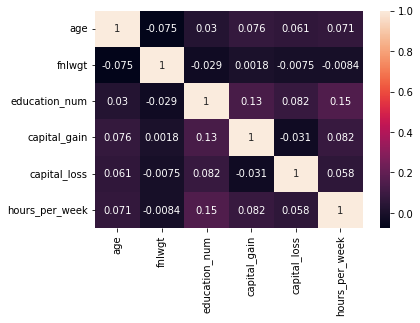

In [ ]:
corr = df.corr(method = "pearson")
sns.heatmap(corr, annot= True)
plt.show

<function matplotlib.pyplot.show>

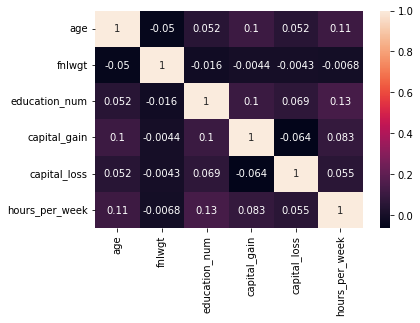

In [ ]:
corr = df.corr(method = "kendall")
sns.heatmap(corr, annot= True)
plt.show

<function matplotlib.pyplot.show>

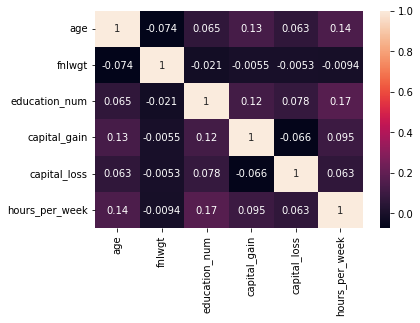

In [ ]:
corr = df.corr(method = "spearman")
sns.heatmap(corr, annot= True)
plt.show

Nic ciekawego z nich nie wynika. I tak planujemy zamienić zmienne ciągłe na kategoryczne. Wcześniej użyliśmy metody Cramera V do zbadania korelacji zmiennych kategorycznych (mimo że nie wszystkie takie są). Istnieje jeszcze metoda Theils U, która jest jednak o wiele bardziej skomplikowana w implementacji. Można byłoby jeszcze policzyć korelację uniwersalną, działającą zarówno na zmiennych kategorycznych jak i zmiennych ciągłych w jednym zbiorze, zwaną "Correlation Ratio". Skoro jednak chcemy zaraz i tak zamienić sobie wszystkie zmienne ciągłe na kategoryczne, na razie sobie darujemy.

Na koniec użyjmy jeszcze pewnej biblioteki, służącej między innymi do liczenia korelacji między zmiennymi wszelakiego typu (zmienne nie muszą być tego samego typu).

In [ ]:
!pip install dython
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

Czy biblioteka poprawnie wykryje zmienne kategoryczne?

In [ ]:
categorical_features = identify_nominal_columns(df)
categorical_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income_level']

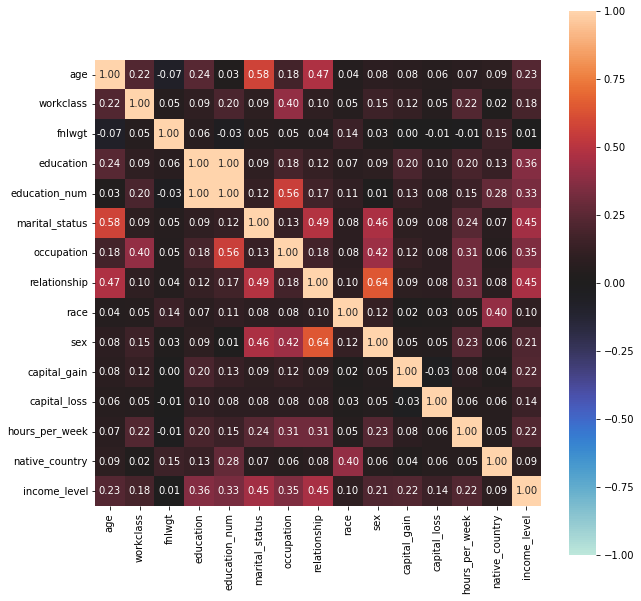

In [ ]:
complete_correlation = associations(df, figsize=(10,10))

Funkcja z biblioteki automatycznie wykrywa typ zmiennych i używa korelacji Pearson'a R do obliczenia korelacji między zmienną ciągłą, a zmienną ciągłą, korelacji Cramer'a V (chyba domyślnie) lub Theil'a U do liczenia korelacji między zmienną kategoryczną, a kategoryczną oraz korelacji Correlation Ratio do liczenia korelacji między zmienną ciągłą, a zmienną kategoryczną.

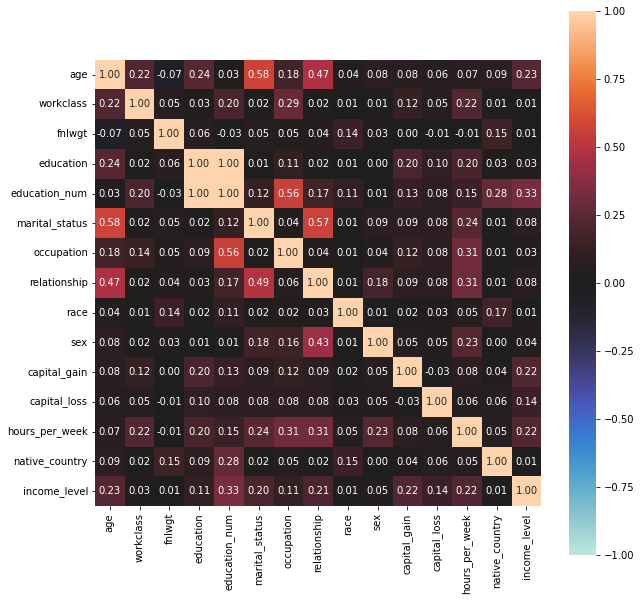

In [ ]:
complete_correlation2 = associations(df, figsize=(10,10), nom_nom_assoc='theil')

Na górze policzyliśmy tak samo korelacje, tylko że do liczenia korelacji między zmienną kategoryczną, a drugą zmienną kategoryczną użyliśmy metody Theil'a U.

Możemy sobie również wyekstraktować policzone korelacje do macierzy.

In [ ]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
age,1.00,0.22,-0.07,0.24,0.03,0.58,0.18,0.47,0.04,0.08,0.08,0.06,0.07,0.09,0.23
workclass,0.22,1.00,0.05,0.09,0.20,0.09,0.40,0.10,0.05,0.15,0.12,0.05,0.22,0.02,0.18
fnlwgt,-0.07,0.05,1.00,0.06,-0.03,0.05,0.05,0.04,0.14,0.03,0.00,-0.01,-0.01,0.15,0.01
education,0.24,0.09,0.06,1.00,1.00,0.09,0.18,0.12,0.07,0.09,0.20,0.10,0.20,0.13,0.36
education_num,0.03,0.20,-0.03,1.00,1.00,0.12,0.56,0.17,0.11,0.01,0.13,0.08,0.15,0.28,0.33
marital_status,0.58,0.09,0.05,0.09,0.12,1.00,0.13,0.49,0.08,0.46,0.09,0.08,0.24,0.07,0.45
occupation,0.18,0.40,0.05,0.18,0.56,0.13,1.00,0.18,0.08,0.42,0.12,0.08,0.31,0.06,0.35
relationship,0.47,0.10,0.04,0.12,0.17,0.49,0.18,1.00,0.10,0.64,0.09,0.08,0.31,0.08,0.45
race,0.04,0.05,0.14,0.07,0.11,0.08,0.08,0.10,1.00,0.12,0.02,0.03,0.05,0.40,0.10
sex,0.08,0.15,0.03,0.09,0.01,0.46,0.42,0.64,0.12,1.00,0.05,0.05,0.23,0.06,0.21


Na razie mamy zmienne ciągłe i kategoryczne. Możemy użyć biblioteki do samych zmiennych kategorycznych.

In [ ]:
selected_column= df[categorical_features]
categorical_df = selected_column.copy()

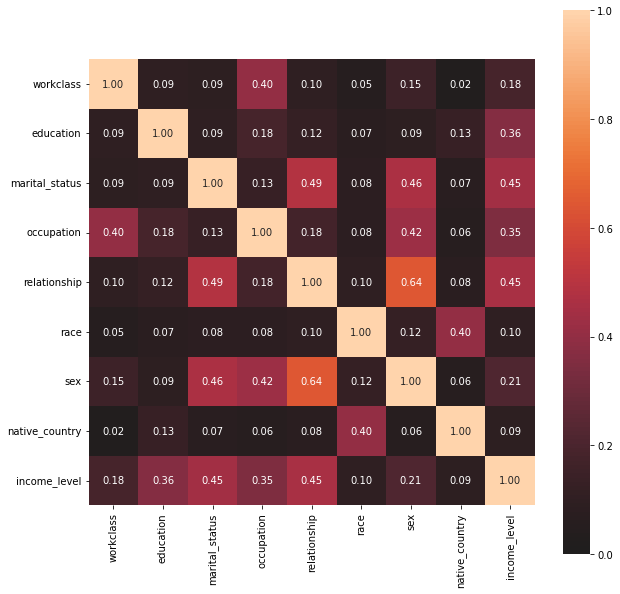

In [ ]:
categorical_correlation= associations(categorical_df, figsize=(10,10))

In [ ]:
df_categorical_corr=categorical_correlation['corr']
df_categorical_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income_level
workclass,1.00,0.09,0.09,0.40,0.10,0.05,0.15,0.02,0.18
education,0.09,1.00,0.09,0.18,0.12,0.07,0.09,0.13,0.36
marital_status,0.09,0.09,1.00,0.13,0.49,0.08,0.46,0.07,0.45
occupation,0.40,0.18,0.13,1.00,0.18,0.08,0.42,0.06,0.35
relationship,0.10,0.12,0.49,0.18,1.00,0.10,0.64,0.08,0.45
race,0.05,0.07,0.08,0.08,0.10,1.00,0.12,0.40,0.10
sex,0.15,0.09,0.46,0.42,0.64,0.12,1.00,0.06,0.21
native_country,0.02,0.13,0.07,0.06,0.08,0.40,0.06,1.00,0.09
income_level,0.18,0.36,0.45,0.35,0.45,0.10,0.21,0.09,1.00


## Porównanie danych do budowania z danymi testowymi przed preprocessingiem

Najpierw sprawdźmy, czy występują jakieś braki danych.

In [ ]:
df_test.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_level      0
dtype: int64

In [ ]:
print(df_test.loc[df_test.workclass == "?"].__len__())
print(df_test.loc[df_test.occupation == "?"].__len__())
print(df_test.loc[df_test.native_country == "?"].__len__())

562
564
204


Występują w tych samych zmiennych i w tej samej postaci - znakach zapytania.

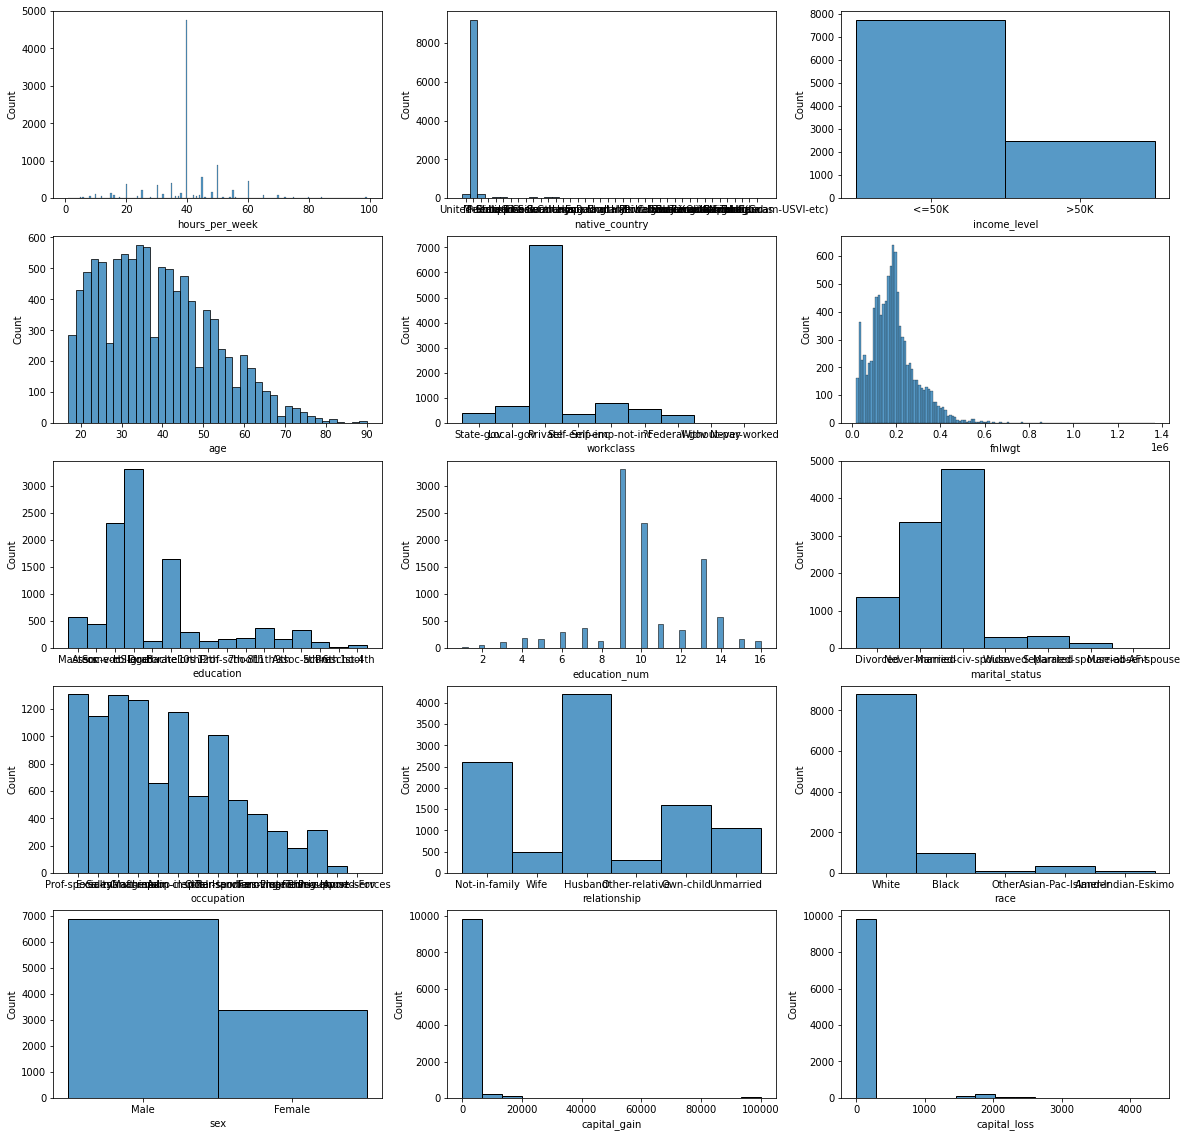

In [ ]:
fig, axs = plt.subplots(nrows=5,ncols=3, figsize= (20,20))
for i in range(5):
    for j in range(3):
        sns.histplot(df_test, x=df_test.columns[(i-1)*3 + j], ax=axs[i,j])

Rozkłady na pierwszy rzut oka wyglądają całkiem podobnie.

In [ ]:
df_test.loc[df_test.capital_gain == 99999].__len__()

54

Zmienna 'capital_gain' i tutaj być może sczapeczkowana.

In [ ]:
# A = [[0 for x in range(15)] for x in range(15)]
# for i in range(15):
#     for j in range(i+1,15):
#         A[i][j]= cramers_v2(df.iloc[:,i], df.iloc[:,j])
# plt.figure(figsize = (10,10))
# sns.heatmap(A, annot=True)

In [ ]:
# A = [[0 for x in range(15)] for x in range(15)]
# for i in range(15):
#     for j in range(i+1,15):
#         A[i][j]= cramers_v2(df_test.iloc[:,i], df_test.iloc[:,j])
# plt.figure(figsize = (10,10))
# sns.heatmap(A, annot=True)

Korelacje również wyglądają niemal identycznie. Sprawdźmy jeszcze korelacje przy użyciu biblioteki.

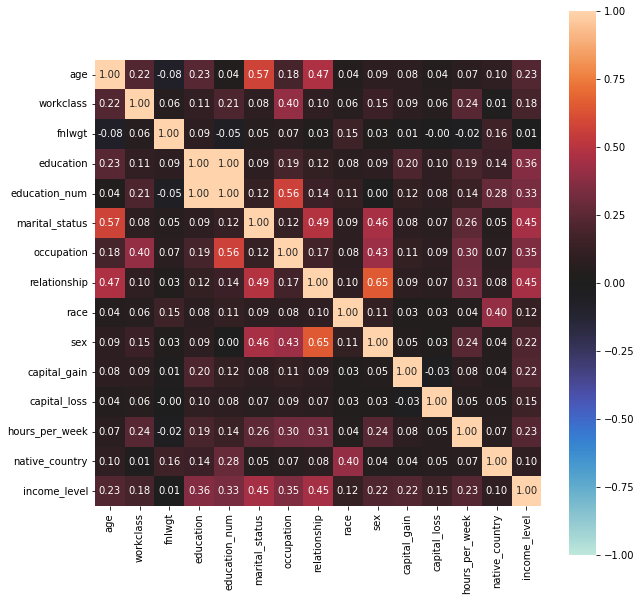

In [ ]:
complete_correlation_test = associations(df_test, figsize=(10,10))

Tutaj również wyglądają niemal identycznie. Możemy zrobić również i w tym przypadku z nich macierz i odjąć ją od macierzy otrzymanej na zbiorze do budowy.

In [ ]:
df_complete_corr_test = complete_correlation_test['corr']
df_complete_corr_test.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
age,1.00,0.22,-0.08,0.23,0.04,0.57,0.18,0.47,0.04,0.09,0.08,0.04,0.07,0.10,0.23
workclass,0.22,1.00,0.06,0.11,0.21,0.08,0.40,0.10,0.06,0.15,0.09,0.06,0.24,0.01,0.18
fnlwgt,-0.08,0.06,1.00,0.09,-0.05,0.05,0.07,0.03,0.15,0.03,0.01,-0.00,-0.02,0.16,0.01
education,0.23,0.11,0.09,1.00,1.00,0.09,0.19,0.12,0.08,0.09,0.20,0.10,0.19,0.14,0.36
education_num,0.04,0.21,-0.05,1.00,1.00,0.12,0.56,0.14,0.11,0.00,0.12,0.08,0.14,0.28,0.33
marital_status,0.57,0.08,0.05,0.09,0.12,1.00,0.12,0.49,0.09,0.46,0.08,0.07,0.26,0.05,0.45
occupation,0.18,0.40,0.07,0.19,0.56,0.12,1.00,0.17,0.08,0.43,0.11,0.09,0.30,0.07,0.35
relationship,0.47,0.10,0.03,0.12,0.14,0.49,0.17,1.00,0.10,0.65,0.09,0.07,0.31,0.08,0.45
race,0.04,0.06,0.15,0.08,0.11,0.09,0.08,0.10,1.00,0.11,0.03,0.03,0.04,0.40,0.12
sex,0.09,0.15,0.03,0.09,0.00,0.46,0.43,0.65,0.11,1.00,0.05,0.03,0.24,0.04,0.22


In [ ]:
x = df_complete_corr - df_complete_corr_test
x.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
age,0.00,0.00,0.00,0.00,-0.01,0.01,-0.01,0.00,0.00,-0.00,-0.00,0.02,0.00,-0.01,0.01
workclass,0.00,0.00,-0.01,-0.01,-0.01,0.01,-0.00,0.00,-0.01,0.01,0.03,-0.01,-0.01,0.01,0.00
fnlwgt,0.00,-0.01,0.00,-0.03,0.02,-0.01,-0.03,0.02,-0.01,-0.00,-0.01,-0.00,0.01,-0.00,-0.00
education,0.00,-0.01,-0.03,0.00,-0.00,0.01,-0.00,0.01,-0.00,0.01,-0.00,0.00,0.01,-0.01,-0.00
education_num,-0.01,-0.01,0.02,-0.00,0.00,0.00,-0.00,0.02,-0.01,0.01,0.01,-0.00,0.01,-0.01,-0.00
marital_status,0.01,0.01,-0.01,0.01,0.00,0.00,0.01,-0.00,-0.01,0.00,0.00,0.01,-0.02,0.02,-0.01
occupation,-0.01,-0.00,-0.03,-0.00,-0.00,0.01,0.00,0.01,-0.00,-0.00,0.00,-0.00,0.01,-0.00,0.00
relationship,0.00,0.00,0.02,0.01,0.02,-0.00,0.01,0.00,-0.01,-0.01,0.00,0.01,0.00,-0.00,0.00
race,0.00,-0.01,-0.01,-0.00,-0.01,-0.01,-0.00,-0.01,0.00,0.01,-0.01,-0.00,0.01,0.00,-0.02
sex,-0.00,0.01,-0.00,0.01,0.01,0.00,-0.00,-0.01,0.01,0.00,0.00,0.02,-0.01,0.02,-0.00


Niemalże identyczne.

## Braki danych

Wstępna analiza pokazała nam braki danych w trzech miejscach:
1. zmienna 'workclass' zawiera znaki zapytania,
2. zmienna 'occupation' zawiera znaki zapytania,
3. zmienna 'native_country' zawiera znaki zapytania.

Rozprawmy się z nimi po kolei.

### workclass

Przypomnijmy ile ich jest.

In [ ]:
df.loc[df.workclass == "?"].__len__()

1389

Jest to stosunkowo dużo kolumn. Nie ma sensu usuwać je wszystkie. Zobaczmy ich rozkład.

In [ ]:
df['workclass'].describe()

count       23932
unique          9
top       Private
freq        16511
Name: workclass, dtype: object

In [ ]:
df['workclass'].value_counts()

Private             16511
Self-emp-not-inc     1952
Local-gov            1538
?                    1389
State-gov            1016
Self-emp-inc          835
Federal-gov           675
Without-pay             9
Never-worked            7
Name: workclass, dtype: int64

Zastąpmy na razie wszystkie braki danych najczęściej występującą wartością, "Private".

In [ ]:
df_fixed = df.copy()
# df_fixed
df_fixed.loc[df_fixed["workclass"] == "?", "workclass"] = "Private"
df_fixed['workclass'].value_counts()

Private             17900
Self-emp-not-inc     1952
Local-gov            1538
State-gov            1016
Self-emp-inc          835
Federal-gov           675
Without-pay             9
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df_fixed

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
20969,34,Private,36385.0,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,2258.0,50.0,United-States,<=50K
14393,23,Private,150463.0,HS-grad,9,Never-married,Priv-house-serv,Unmarried,Other,Female,0.0,0.0,40.0,Guatemala,<=50K
2480,41,Private,195897.0,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
10614,39,Local-gov,189911.0,11th,7,Divorced,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
31047,45,Private,191098.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,China,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45031,33,Local-gov,40142.0,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,56.0,United-States,<=50K
24143,40,Private,34113.0,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Male,6849.0,0.0,43.0,United-States,<=50K
23994,43,Private,184321.0,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.0,1887.0,40.0,United-States,>50K
1398,51,Private,246519.0,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,2105.0,0.0,45.0,United-States,<=50K


In [ ]:
df['workclass'].value_counts()

Private             16511
Self-emp-not-inc     1952
Local-gov            1538
?                    1389
State-gov            1016
Self-emp-inc          835
Federal-gov           675
Without-pay             9
Never-worked            7
Name: workclass, dtype: int64

### occupation

Ile ich jest?

In [ ]:
df_fixed.loc[df_fixed.occupation == "?"].__len__()

1396

In [ ]:
df_fixed['occupation'].describe()

count            23932
unique              15
top       Craft-repair
freq              3042
Name: occupation, dtype: object

In [ ]:
df_fixed['occupation'].value_counts()

Craft-repair         3042
Prof-specialty       3018
Exec-managerial      2927
Adm-clerical         2713
Sales                2704
Other-service        2441
Machine-op-inspct    1429
?                    1396
Transport-moving     1151
Handlers-cleaners    1034
Farming-fishing       727
Tech-support          722
Protective-serv       493
Priv-house-serv       127
Armed-Forces            8
Name: occupation, dtype: int64

Nie ma jednej przeważającej wartości. Są one dość ładnie rozłożone. Spróbujmy więc może innego podejścia. Zastąpmy braki danych w postaci znaków zapytania według częstości występowania poszczególnych wartości.

In [ ]:
s = df_fixed.occupation.value_counts(normalize = True)
df_fixed.loc[df_fixed.occupation == "?", 'occupation'] = np.random.choice(s.index, p=s.values, size=df_fixed.loc[df_fixed.occupation == "?"].__len__())
df_fixed['occupation'].value_counts()

Craft-repair         3224
Prof-specialty       3201
Exec-managerial      3094
Adm-clerical         2870
Sales                2856
Other-service        2588
Machine-op-inspct    1512
Transport-moving     1210
Handlers-cleaners    1104
Tech-support          772
Farming-fishing       765
Protective-serv       524
Priv-house-serv       137
?                      67
Armed-Forces            8
Name: occupation, dtype: int64

### native_country

Zliczmy je.

In [ ]:
df_fixed.loc[df_fixed.native_country == '?'].__len__()

406

In [ ]:
df_fixed['native_country'].describe()

count             23932
unique               42
top       United-States
freq              21526
Name: native_country, dtype: object

In [ ]:
df_fixed['native_country'].value_counts()

United-States                 21526
Mexico                          457
?                               406
Philippines                     152
Germany                         110
Puerto-Rico                      98
Canada                           79
India                            72
England                          68
Cuba                             66
El-Salvador                      63
Italy                            60
China                            55
Dominican-Republic               55
Jamaica                          51
South                            48
Vietnam                          45
Japan                            41
Guatemala                        41
Columbia                         40
Haiti                            39
Poland                           39
Portugal                         30
Taiwan                           29
Nicaragua                        26
Iran                             24
Greece                           24
Peru                        

Ponownie zastąpienie braków danych zdecydowanie najpopularniejszą wartością - 'United-State' wydaje się być dobrym pomysłem. Zróbmy to.

In [ ]:
df_fixed.loc[df_fixed["native_country"] == "?", "native_country"] = "United-States"
df_fixed["native_country"].value_counts()

United-States                 21932
Mexico                          457
Philippines                     152
Germany                         110
Puerto-Rico                      98
Canada                           79
India                            72
England                          68
Cuba                             66
El-Salvador                      63
Italy                            60
China                            55
Dominican-Republic               55
Jamaica                          51
South                            48
Vietnam                          45
Japan                            41
Guatemala                        41
Columbia                         40
Haiti                            39
Poland                           39
Portugal                         30
Taiwan                           29
Nicaragua                        26
Iran                             24
Greece                           24
Peru                             24
Ireland                     

## Dalszy preprocessing

### Wyrzucenie niepotrzebnych danych

Wyrzucamy fnlwgt i education.

In [ ]:
df_fixed = df_fixed.loc[:,~df_fixed.columns.isin(['fnlwgt','education'])]

In [ ]:
df_fixed

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
20969,34,Private,14,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,2258.0,50.0,United-States,<=50K
14393,23,Private,9,Never-married,Priv-house-serv,Unmarried,Other,Female,0.0,0.0,40.0,Guatemala,<=50K
2480,41,Private,10,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
10614,39,Local-gov,7,Divorced,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
31047,45,Private,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,China,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45031,33,Local-gov,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,56.0,United-States,<=50K
24143,40,Private,9,Never-married,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Male,6849.0,0.0,43.0,United-States,<=50K
23994,43,Private,6,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.0,1887.0,40.0,United-States,>50K
1398,51,Private,6,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,2105.0,0.0,45.0,United-States,<=50K


### Zmiana ciągłych na dyskretne i encoding

#### Niezbędne importy

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

#### zakodowanie zmiennej target

In [ ]:
df_fixed['income_level'] = df_fixed['income_level'].apply(lambda x: 1 if (x=='>50K') else 0)

In [ ]:
df_fixed['income_level'].value_counts()

0    18255
1     5677
Name: income_level, dtype: int64

#### capital_loss i capital_gain

In [ ]:
df_fixed.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income_level'],
      dtype='object')

<AxesSubplot:>

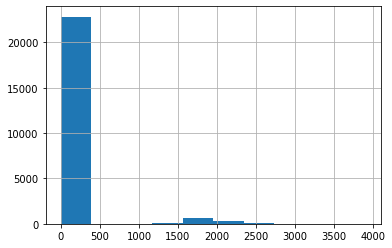

In [ ]:
df_fixed['capital_loss'].hist()

Zdecydowana większość wartości to 0.

In [ ]:
df_fixed.loc[df_fixed['capital_loss']==0]['income_level'].value_counts()

0    17696
1     5132
Name: income_level, dtype: int64

In [ ]:
df_fixed.loc[df_fixed['capital_loss']>0]['income_level'].value_counts()

0    559
1    545
Name: income_level, dtype: int64

In [ ]:
(7389/25235)/(782/782)

0.2928076084802853

In [ ]:
df_fixed.loc[df_fixed['capital_gain']==0]['income_level'].value_counts()

0    17504
1     4458
Name: income_level, dtype: int64

In [ ]:
df_fixed.loc[df_fixed['capital_gain']>0]['income_level'].value_counts()

1    1219
0     751
Name: income_level, dtype: int64

In [ ]:
(6414/24943)/(1757/1075)

0.1573319667418835

Wygląda na to, że podzielenie wartości tych cech tylko na dwa proste kubełki da dobre rezulataty.

In [ ]:
df_fixed['capital_loss'] = df_fixed['capital_loss'].apply(lambda x: 0 if (x==0) else 1)

In [ ]:
df_fixed['capital_gain'] = df_fixed['capital_gain'].apply(lambda x: 0 if (x==0) else 1)

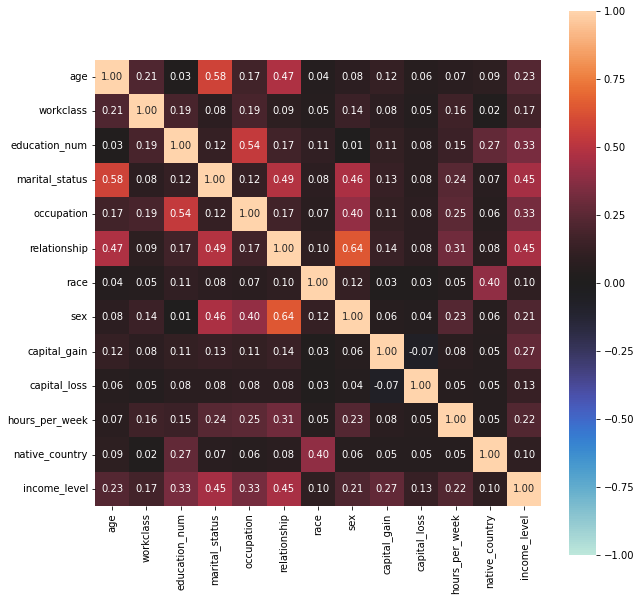

In [ ]:
complete_correlation = associations(df_fixed, figsize=(10,10))

#### age 

Dzielimy zmienną 'age' na pięć kwantyli.

In [ ]:
df_fixed['age'] = pd.qcut(df_fixed['age'], q=5, labels=False)

Sprawdźmy jak wyglądają korelacje po zamianie wszystkich zmiennych ciągłych na zmienne kategoryczne.

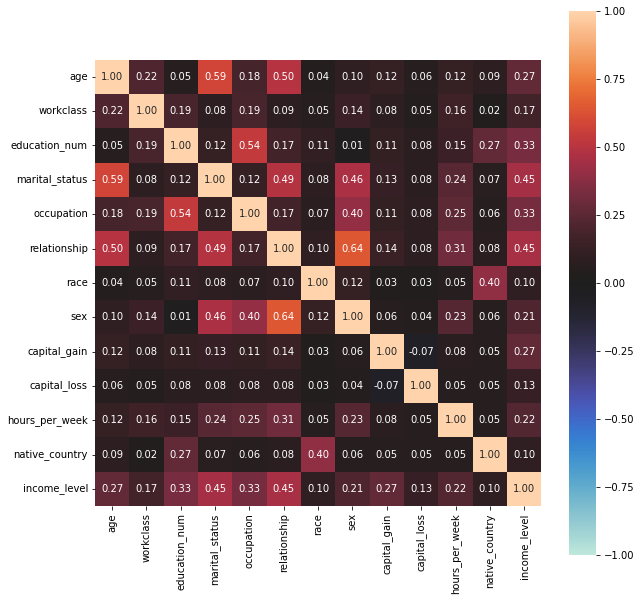

{'ax': <AxesSubplot:>,
 'corr':                      age  workclass  education_num  marital_status  \
 age             1.000000   0.215375       0.051928        0.585908   
 workclass       0.215375   1.000000       0.190720        0.078620   
 education_num   0.051928   0.190720       1.000000        0.121801   
 marital_status  0.585908   0.078620       0.121801        1.000000   
 occupation      0.184960   0.194101       0.535260        0.120072   
 relationship    0.496491   0.091224       0.166542        0.488479   
 race            0.042521   0.052450       0.107072        0.081973   
 sex             0.095100   0.143295       0.012987        0.461785   
 capital_gain    0.119453   0.084983       0.111081        0.131003   
 capital_loss    0.060543   0.046593       0.077344        0.076040   
 hours_per_week  0.124539   0.161596       0.148118        0.239443   
 native_country  0.090653   0.023599       0.272185        0.066078   
 income_level    0.269902   0.172022       0.3

In [ ]:
associations(df_fixed, figsize=(10, 10))

#### One Hot Encoding

In [ ]:
df_fixed.loc[:,['workclass','marital_status', 'education_num','occupation',
       'relationship', 'race', 'sex',
       'hours_per_week', 'native_country']].nunique()

workclass          8
marital_status     7
education_num     16
occupation        15
relationship       6
race               5
sex                2
hours_per_week    92
native_country    41
dtype: int64

Właściwie dla pierwszych 7 kolumn moglibyśmy zastosować one-hot encoding. Płeć jest właściwie już zakodowana, trzeba tylko zamienić na 1 i 0 z nazwami płci. W education_num mamy ustalony porządek więc również możemy ją zostawić nieruszoną.

In [ ]:
oneHotEncoder = ce.OneHotEncoder(cols = ['workclass','marital_status','occupation','relationship','race'], use_cat_names=True)

In [ ]:
df_fixed['sex'] = df_fixed['sex'].apply(lambda x: 0 if (x=='Male') else 1)

In [ ]:
#powinnismy tu zrobic encoda

In [ ]:
df_encoded = df_fixed.copy()
df_encoded = oneHotEncoder.fit_transform(df_encoded)
df_encoded.head()

,age,workclass_Private,workclass_Local-gov,workclass_State-gov,workclass_Federal-gov,workclass_Self-emp-not-inc,workclass_Self-emp-inc,workclass_Without-pay,workclass_Never-worked,education_num,...,race_Other,race_Asian-Pac-Islander,race_Black,race_Amer-Indian-Eskimo,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
20969,2,1,0,0,0,0,0,0,0,14,...,0,0,0,0,0,0,1,50.0,United-States,0
14393,0,1,0,0,0,0,0,0,0,9,...,1,0,0,0,1,0,0,40.0,Guatemala,0
2480,2,1,0,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,50.0,United-States,0
10614,2,0,1,0,0,0,0,0,0,7,...,0,0,0,0,1,0,0,40.0,United-States,0
31047,3,1,0,0,0,0,0,0,0,13,...,0,1,0,0,0,0,0,40.0,China,0


#### native_country

In [ ]:
df_encoded['native_country'].value_counts()

United-States                 21932
Mexico                          457
Philippines                     152
Germany                         110
Puerto-Rico                      98
Canada                           79
India                            72
England                          68
Cuba                             66
El-Salvador                      63
Italy                            60
China                            55
Dominican-Republic               55
Jamaica                          51
South                            48
Vietnam                          45
Japan                            41
Guatemala                        41
Columbia                         40
Haiti                            39
Poland                           39
Portugal                         30
Taiwan                           29
Nicaragua                        26
Iran                             24
Greece                           24
Peru                             24
Ireland                     

Pomysł jest taki, żeby pogrupować kraje po PKB. Poszukajmy odpowiedniej ramki danych.

In [ ]:
!wget https://datahub.io/core/gdp/r/gdp.csv
gdp = pd.read_csv('gdp.csv')
gdp

--2022-04-01 12:57:15--  https://datahub.io/core/gdp/r/gdp.csv
Resolving datahub.io (datahub.io)... 104.21.40.221, 172.67.157.38, 2606:4700:3033::6815:28dd, ...
Connecting to datahub.io (datahub.io)|104.21.40.221|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pkgstore.datahub.io/core/gdp/gdp_csv/data/0048bc8f6228d0393d41cac4b663b90f/gdp_csv.csv [following]
--2022-04-01 12:57:16--  https://pkgstore.datahub.io/core/gdp/gdp_csv/data/0048bc8f6228d0393d41cac4b663b90f/gdp_csv.csv
Resolving pkgstore.datahub.io (pkgstore.datahub.io)... 172.67.157.38, 104.21.40.221, 2606:4700:3033::6815:28dd, ...
Connecting to pkgstore.datahub.io (pkgstore.datahub.io)|172.67.157.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 454342 (444K) [text/plain]
Saving to: ‘gdp.csv’

gdp.csv             100%[===================>] 443.69K  --.-KB/s    in 0.04s   

2022-04-01 12:57:17 (11.0 MB/s) - ‘gdp.csv’ saved [454342/454342]



,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


Badanie zostało przeprowadzone w 1994 roku.

In [ ]:
gdp = gdp.loc[gdp['Year'] == 1994]

In [ ]:
countries_df_csv = list(df_build['native_country'].unique())

In [ ]:
df_encoded['native_country'].unique()

array(['United-States', 'Guatemala', 'China', 'Mexico', 'Poland',
       'Dominican-Republic', 'Cuba', 'Scotland', 'Philippines', 'Canada',
       'Germany', 'Italy', 'India', 'Ireland', 'France', 'England',
       'Columbia', 'Iran', 'El-Salvador', 'Haiti', 'Jamaica', 'Nicaragua',
       'Vietnam', 'Peru', 'Cambodia', 'South', 'Ecuador', 'Japan', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)', 'Taiwan', 'Puerto-Rico',
       'Trinadad&Tobago', 'Portugal', 'Greece', 'Honduras', 'Hong',
       'Yugoslavia', 'Hungary', 'Holand-Netherlands'], dtype=object)

In [ ]:
countries_gdp_csv = list(gdp['Country Name'].unique())

In [ ]:
temp = countries_df_csv.copy()
for country in countries_df_csv:
    if country in countries_gdp_csv:
        temp.remove(country)

In [ ]:
geo_dict = {
    'United-States': 'United States',
    'South': 'South Africa',
    'Puerto-Rico': 'Puerto Rico',
    'Dominican-Republic': 'Dominican Republic',
    'Yugoslavia': 'Albania', # not that good
    'El-Salvador': 'El Salvador',
    'Laos': 'Lao PDR',
    'Hong': 'Hong Kong SAR, China',
    'Iran': 'Iran, Islamic Rep.',
    'England': 'United Kingdom',
    'Taiwan': 'Hong Kong SAR, China', # not that good
    'Columbia': 'Colombia',
    'Scotland': 'United Kingdom',
    'Outlying-US(Guam-USVI-etc)': 'United States',
    'Trinadad&Tobago': 'Trinidad and Tobago',
    'Holand-Netherlands': 'Netherlands'
}

In [ ]:
df_encoded = df_encoded.replace({'native_country': geo_dict})

In [ ]:
countries = pd.DataFrame(df_encoded['native_country'].unique())
value_dict = pd.Series(gdp['Value'].values,index=gdp['Country Name']).to_dict()
countries["gdp"] = countries[0].map(value_dict)

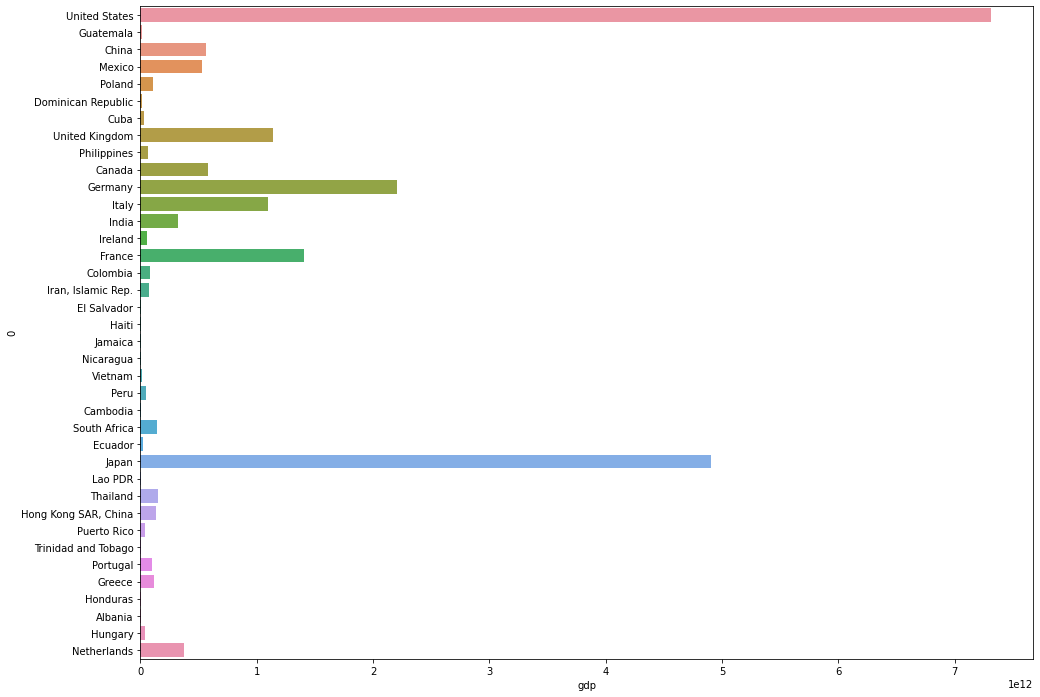

In [ ]:
plt.figure(figsize=(16,12))
sns.barplot(data = countries, y = 0, x = 'gdp')
plt.show()
#df_encoded['native_country'] = df_encoded['native_country'].apply(lambda x: 1 if x in ['United States', 'Japan', 'Germany', 'France', 'Italy', 'United Kingdom', 'China', 'Mexico', 'Canada', 'India'] else 0)
#df_encoded.head()

In [ ]:
countries['gdp']=pd.qcut(countries['gdp'], q=5, labels=False)
countries.columns = ['native_country', 'gdp']
countries

,native_country,gdp
0,United States,4
1,Guatemala,1
2,China,4
3,Mexico,3
4,Poland,2
5,Dominican Republic,1
6,Cuba,1
7,United Kingdom,4
8,Philippines,2
9,Canada,4


In [ ]:
df_encoded = pd.merge(df_encoded, countries, on='native_country', how='left')

#### hours_per_week

<AxesSubplot:>

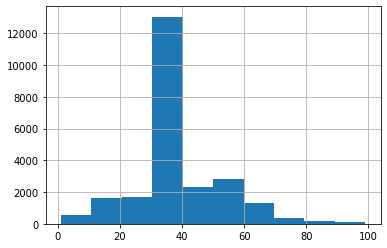

In [ ]:
df_encoded['hours_per_week'].hist()

<AxesSubplot:xlabel='hours_per_week', ylabel='count'>

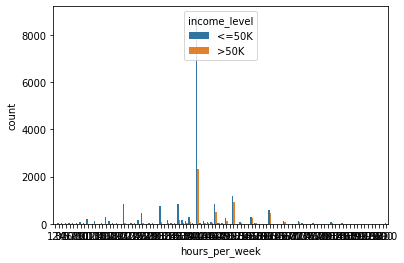

In [ ]:
sns.countplot(data=df, x='hours_per_week', hue='income_level')

Na histogramie widzimy, że rozsądnie byłoby podzielić te cechę na 2 kategorie <=40h i >40h

In [ ]:
df_encoded['hours_per_week'] = df_encoded['hours_per_week'].apply(lambda x: 0 if (x<=40) else 1)

In [ ]:
#df_encoded.drop(['gdp_x','native_country'], axis=1, inplace=True)

In [ ]:
#df_encoded.rename(columns={'gdp_y':'native_country_gdp'}, inplace=True)
#df_encoded['age'] = pd.qcut(df_encoded['age'], q=5, labels=False)

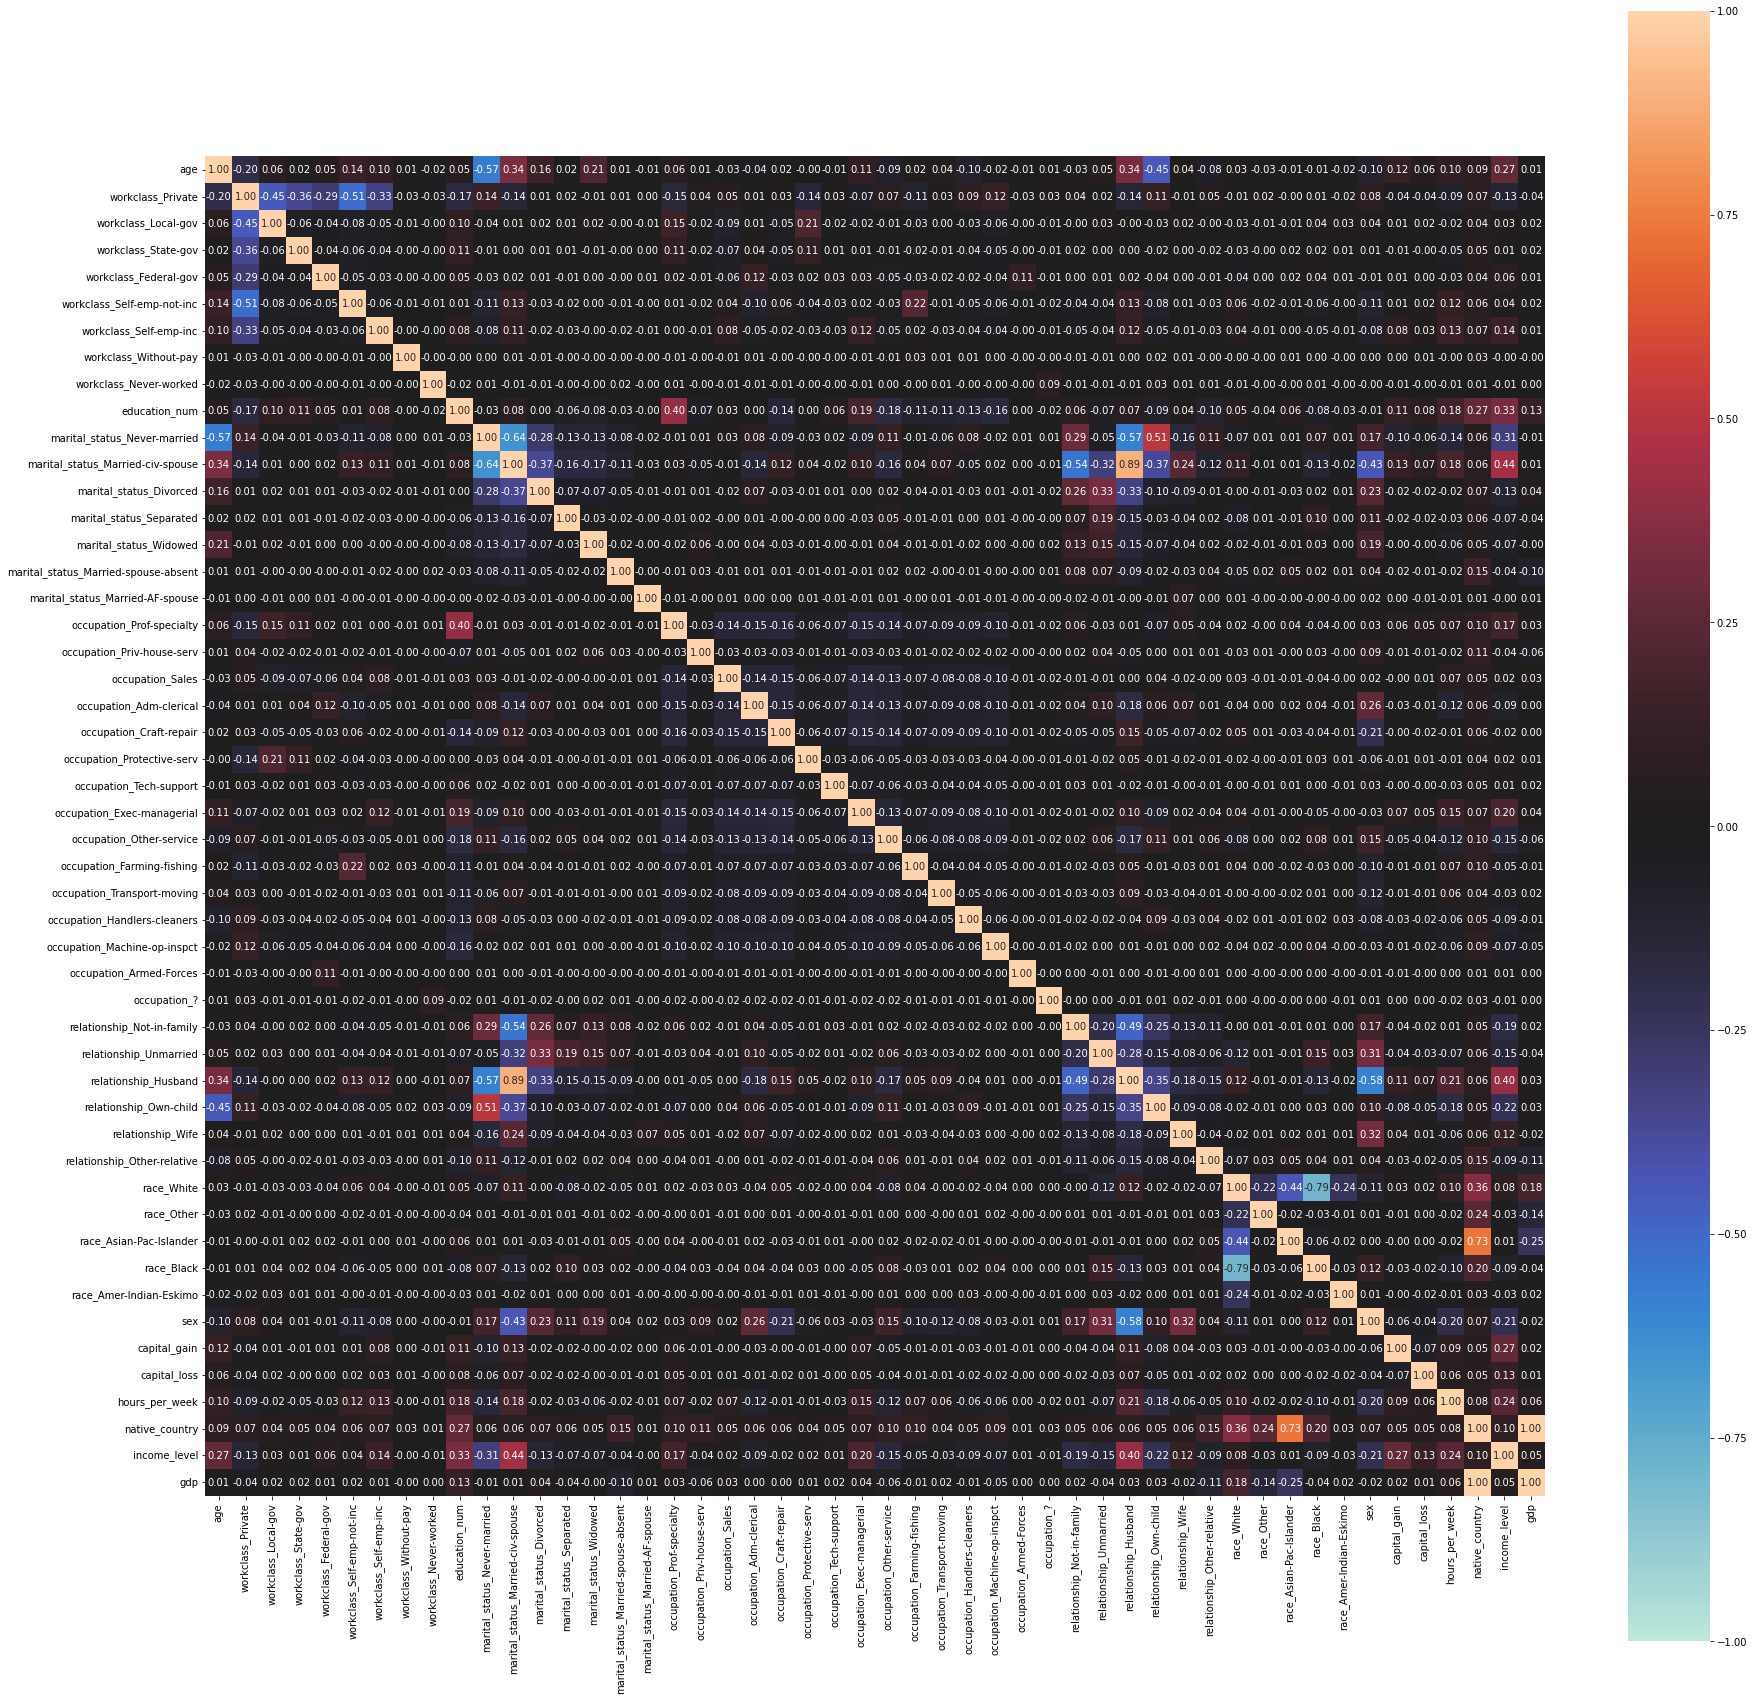

{'ax': <AxesSubplot:>,
 'corr':                                            age  workclass_Private  \
 age                                   1.000000          -0.198801   
 workclass_Private                    -0.198801           1.000000   
 workclass_Local-gov                   0.063013          -0.451448   
 workclass_State-gov                   0.020901          -0.362721   
 workclass_Federal-gov                 0.053888          -0.293475   
 workclass_Self-emp-not-inc            0.142717          -0.513360   
 workclass_Self-emp-inc                0.102745          -0.327538   
 workclass_Without-pay                 0.009705          -0.033413   
 workclass_Never-worked               -0.021913          -0.029466   
 education_num                         0.051928          -0.167137   
 marital_status_Never-married         -0.565212           0.138462   
 marital_status_Married-civ-spouse     0.339592          -0.141821   
 marital_status_Divorced               0.155852           0

In [ ]:
x = associations(df_encoded, figsize = (30, 30))
x

Implementujemy One Hot Encoder.

In [ ]:
#df_encoded_model = oneHotEncoder.fit_transform(df_encoded)

In [ ]:
#df_encoded_model

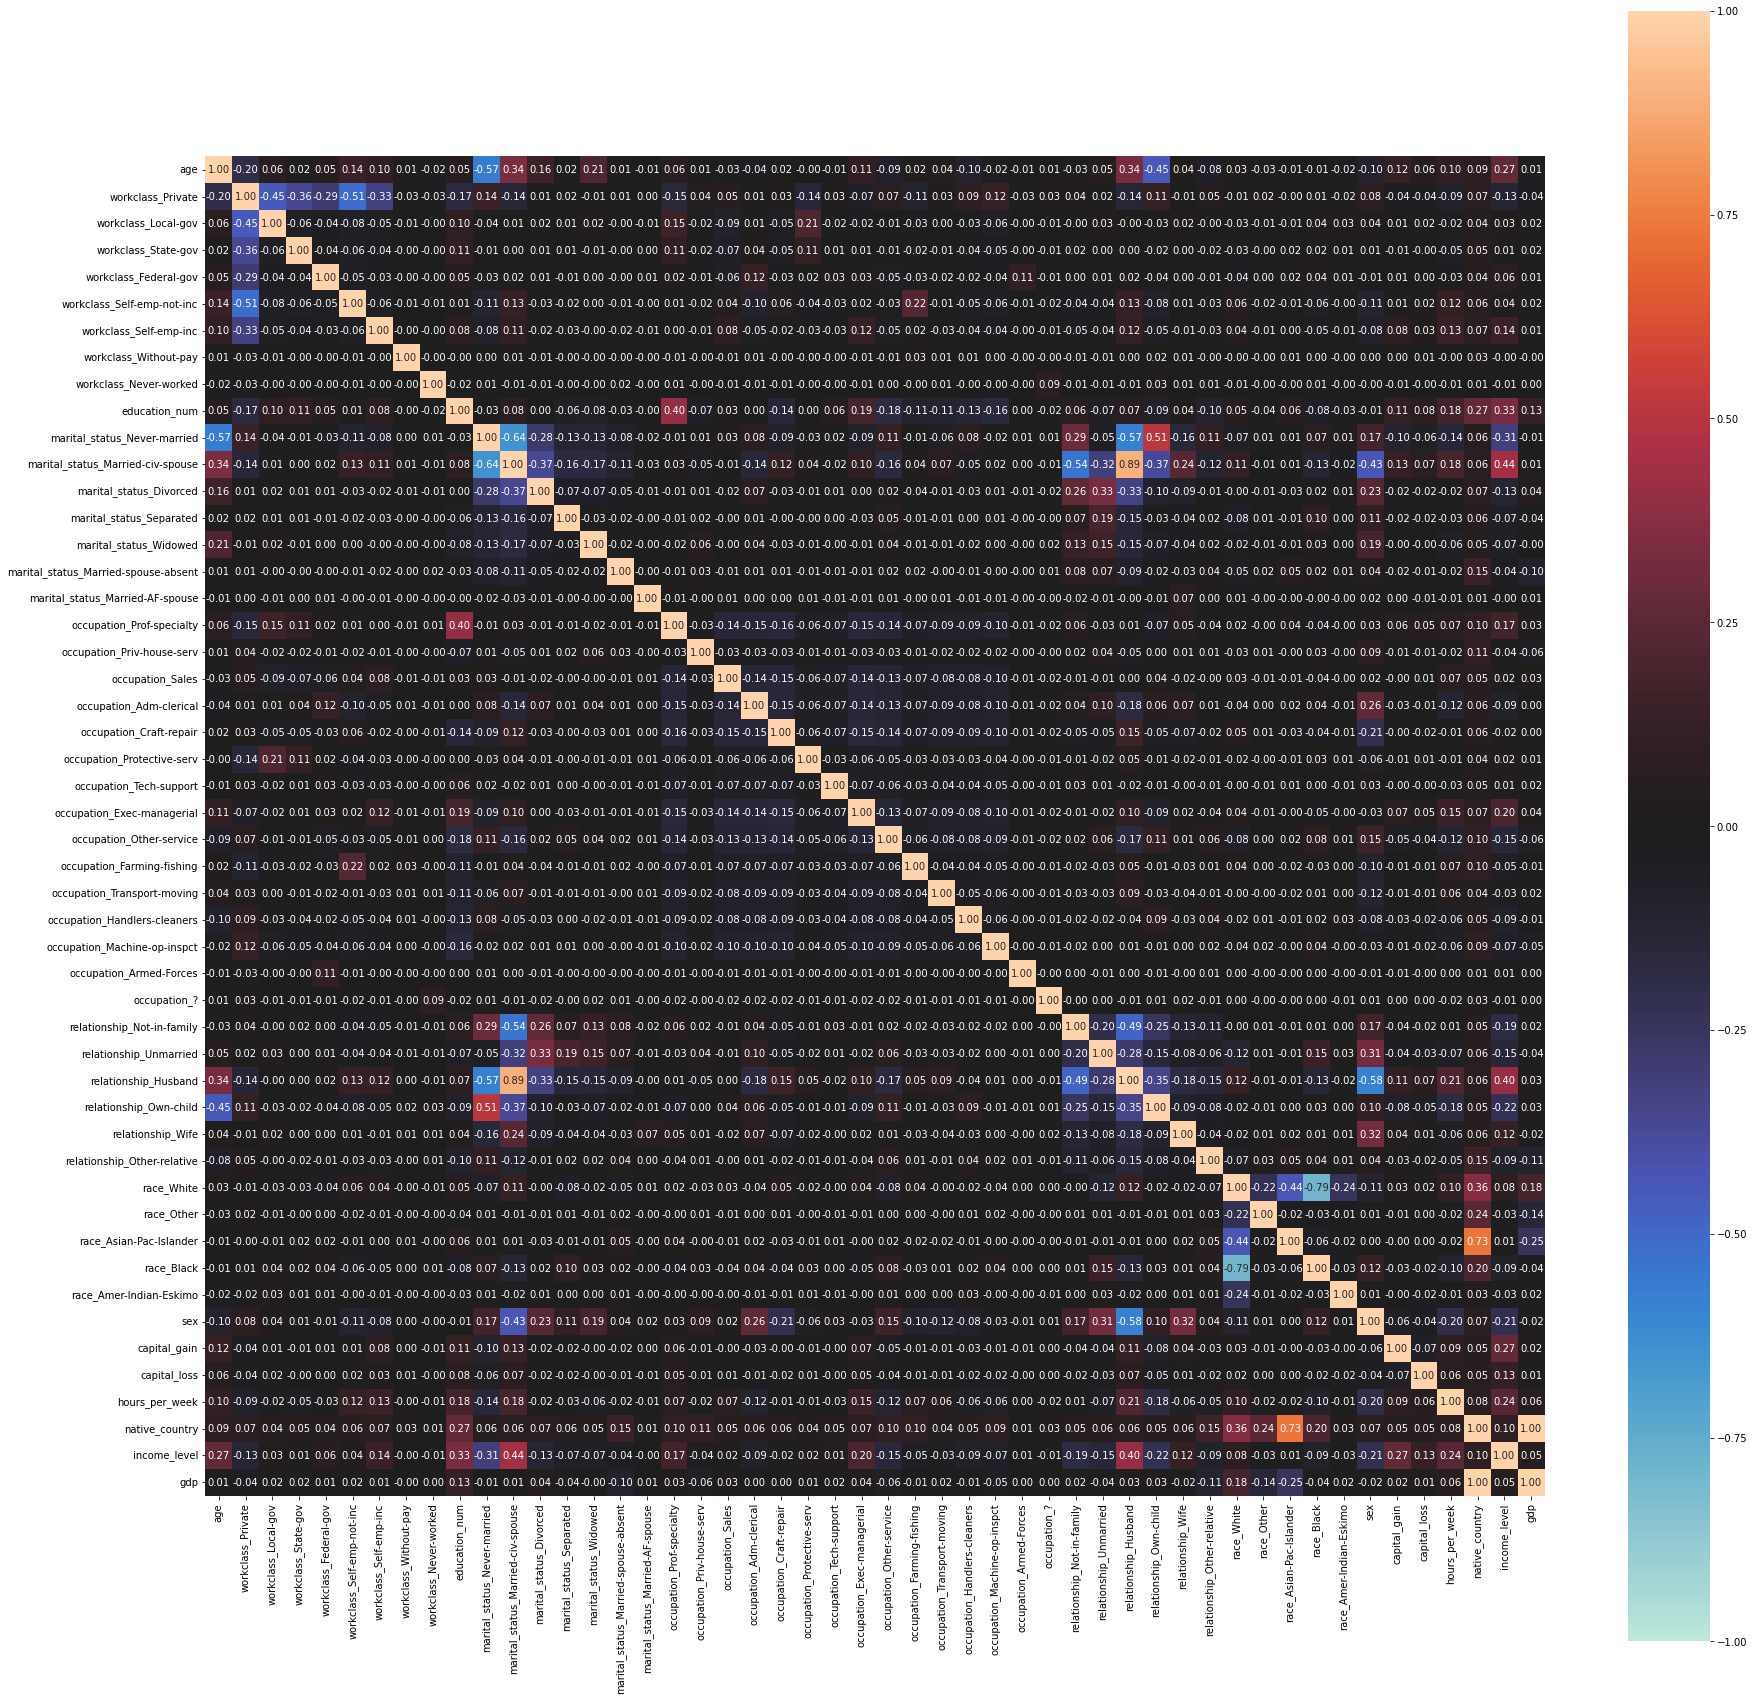

{'ax': <AxesSubplot:>,
 'corr':                                            age  workclass_Private  \
 age                                   1.000000          -0.198801   
 workclass_Private                    -0.198801           1.000000   
 workclass_Local-gov                   0.063013          -0.451448   
 workclass_State-gov                   0.020901          -0.362721   
 workclass_Federal-gov                 0.053888          -0.293475   
 workclass_Self-emp-not-inc            0.142717          -0.513360   
 workclass_Self-emp-inc                0.102745          -0.327538   
 workclass_Without-pay                 0.009705          -0.033413   
 workclass_Never-worked               -0.021913          -0.029466   
 education_num                         0.051928          -0.167137   
 marital_status_Never-married         -0.565212           0.138462   
 marital_status_Married-civ-spouse     0.339592          -0.141821   
 marital_status_Divorced               0.155852           0

In [ ]:
associations(df_encoded, figsize = (30, 30))

In [ ]:
df_encoded

,age,workclass_Private,workclass_Local-gov,workclass_State-gov,workclass_Federal-gov,workclass_Self-emp-not-inc,workclass_Self-emp-inc,workclass_Without-pay,workclass_Never-worked,education_num,...,race_Asian-Pac-Islander,race_Black,race_Amer-Indian-Eskimo,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level,gdp
0,2,1,0,0,0,0,0,0,0,14,...,0,0,0,0,0,1,1,United States,0,4
1,0,1,0,0,0,0,0,0,0,9,...,0,0,0,1,0,0,0,Guatemala,0,1
2,2,1,0,0,0,0,0,0,0,10,...,0,0,0,0,0,0,1,United States,0,4
3,2,0,1,0,0,0,0,0,0,7,...,0,0,0,1,0,0,0,United States,0,4
4,3,1,0,0,0,0,0,0,0,13,...,1,0,0,0,0,0,0,China,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23927,1,0,1,0,0,0,0,0,0,9,...,0,0,0,0,0,0,1,United States,0,4
23928,2,1,0,0,0,0,0,0,0,9,...,0,0,1,0,1,0,1,United States,0,4
23929,3,1,0,0,0,0,0,0,0,6,...,0,1,0,0,0,1,0,United States,1,4
23930,3,1,0,0,0,0,0,0,0,6,...,0,0,0,0,1,0,1,United States,0,4


## Preprocessing danych testowych

In [ ]:
df_testownik = df_test.copy()
df_testownik.loc[df_testownik["workclass"] == "?", "workclass"] = "Private"
s = df_fixed.occupation.value_counts(normalize = True)
df_testownik.loc[df_testownik.occupation == "?", 'occupation'] = np.random.choice(s.index, p=s.values, size=df_testownik.loc[df_testownik.occupation == "?"].__len__())
df_testownik.loc[df_testownik["native_country"] == "?", "native_country"] = "United-States"
df_testownik = df_testownik.loc[:,~df_testownik.columns.isin(['fnlwgt','education'])]
df_testownik['capital_loss'] = df_testownik['capital_loss'].apply(lambda x: 0 if (x==0) else 1)
df_testownik['capital_gain'] = df_testownik['capital_gain'].apply(lambda x: 0 if (x==0) else 1)
df_testownik['age'] = pd.qcut(df_testownik['age'], q=5, labels=False)
df_testownik = oneHotEncoder.fit_transform(df_testownik)
df_testownik = df_testownik.loc[df_testownik['native_country'].isin(list(df_testownik['native_country'].unique()))]
df_testownik = df_testownik.replace({'native_country': geo_dict})
df_testownik = pd.merge(df_testownik, countries, on='native_country', how='left')
df_testownik['hours_per_week'] = df_testownik['hours_per_week'].apply(lambda x: 0 if (x<=40) else 1)
df_testownik.drop(['native_country'], axis=1, inplace=True)
df_testownik['income_level'] = df_testownik['income_level'].apply(lambda x: 1 if (x==">50K") else 0)
df_testownik['sex']=df_testownik['sex'].apply(lambda x: 1 if (x=="Female") else 0)
#df_testownik.rename(columns={'gdp':'native_country_gdp'}, inplace=True)
#df_testownik.loc[:,list(df_encoded.columns)]


In [ ]:
y_test = df_testownik['income_level']
df_testownik = df_testownik.drop(['income_level'], axis=1)

In [ ]:
df_testownik

,age,workclass_State-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_Federal-gov,workclass_Without-pay,workclass_Never-worked,education_num,...,race_White,race_Black,race_Other,race_Asian-Pac-Islander,race_Amer-Indian-Eskimo,sex,capital_gain,capital_loss,hours_per_week,gdp
0,1,1,0,0,0,0,0,0,0,14,...,1,0,0,0,0,0,0,0,0,4
1,2,0,1,0,0,0,0,0,0,11,...,1,0,0,0,0,1,0,0,0,4
2,1,0,0,1,0,0,0,0,0,11,...,1,0,0,0,0,1,0,0,0,4
3,4,0,0,0,1,0,0,0,0,10,...,1,0,0,0,0,0,0,0,1,4
4,3,0,0,1,0,0,0,0,0,9,...,1,0,0,0,0,0,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10252,1,0,1,0,0,0,0,0,0,10,...,1,0,0,0,0,0,0,0,1,4
10253,0,0,0,1,0,0,0,0,0,10,...,1,0,0,0,0,1,0,0,0,4
10254,3,0,0,1,0,0,0,0,0,10,...,1,0,0,0,0,0,0,0,1,4
10255,2,0,1,0,0,0,0,0,0,9,...,1,0,0,0,0,0,0,0,0,4


## Pierwsze modele

### LUŹNY TESTYN

In [ ]:
y = df_encoded['income_level']

In [ ]:
df_encoded = df_encoded.drop(['income_level','native_country'], axis=1)

In [ ]:
sorted(list(df_encoded.columns)) == sorted(list(df_testownik.columns))

True

In [ ]:
df_encoded = df_encoded.reindex(sorted(df_encoded.columns), axis=1)
df_testownik = df_testownik.reindex(sorted(df_testownik.columns), axis=1)

In [ ]:
df_encoded.columns

Index(['age', 'capital_gain', 'capital_loss', 'education_num', 'gdp',
       'hours_per_week', 'marital_status_Divorced',
       'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-re

In [ ]:
df_testownik.columns

Index(['age', 'capital_gain', 'capital_loss', 'education_num', 'gdp',
       'hours_per_week', 'marital_status_Divorced',
       'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-re

In [ ]:
#!python -c 'from scipy import stats'
#import importlib
#from importlib import reload

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.special._ufuncs_cxx import *

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model1 = DecisionTreeClassifier(random_state=1)
model2 = KNeighborsClassifier()
model3 = LogisticRegression(random_state=1, max_iter=1000)

In [ ]:
from sklearn.dummy import DummyClassifier
baseline = DummyClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()

In [ ]:
baseline.fit(df_encoded, y)
y_hat = baseline.predict(df_testownik)
accuracy_score(y_test, y_hat)

0.7568489811835819

In [ ]:
model1.fit(df_encoded, y)
y_hat = model1.predict(df_testownik)
accuracy_score(y_test, y_hat)

0.8075460661011992

In [ ]:
model2.fit(df_encoded, y)
y_hat = model2.predict(df_testownik)
accuracy_score(y_test, y_hat)

0.8262649897630886

In [ ]:
model3.fit(df_encoded, y)
y_hat = model3.predict(df_testownik)
accuracy_score(y_test, y_hat)

0.8426440479672419

In [ ]:
model4.fit(df_encoded, y)
y_hat = model4.predict(df_testownik)
accuracy_score(y_test, y_hat)

0.8273374280978844

In [ ]:
! pip install xgboost
import xgboost
from xgboost import XGBClassifier

In [ ]:
model5 = XGBClassifier()
#accuracy_score(y_test, y_hat)
model5.fit(df_encoded, y)
y_hat = model5.predict(df_testownik)
accuracy_score(y_test, y_hat)

0.8448864190309058

In [ ]:
model6 = XGBClassifier(
    objective='binary:logistic',
    learning_rate = 0.12,
    n_estimators=120,
    max_depth=5,
    min_child_weight=2,
    gamma=0.03,
    reg_alpha=0.01,  
    nround= 100
)
model6.fit(df_encoded, y)
y_hat = model6.predict(df_testownik)
accuracy_score(y_test, y_hat)

0.84839621721751